# TP3 (durée : 3h)
# Reconnaissance d’écriture par réseaux de neurones

## 1. Analyse des données


Import des librairies utilisées dans le tp2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import *
from sklearn.neighbors import *
from sklearn import *
from sklearn.linear_model import *
from sklearn.neural_network import *
import time
from pandas import plotting
import sys 
import json
import pickle



### a) Charger la base de données digits disponible sous sklearn.

Import du dataset

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

Déterminer la dimension D des données et le nombre d’exemple par classe. Observer quelques images :

In [3]:
digits.data.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

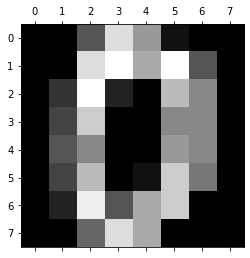

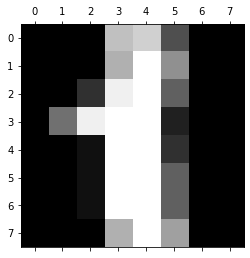

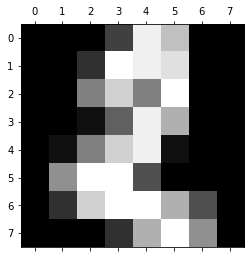

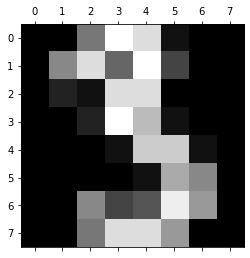

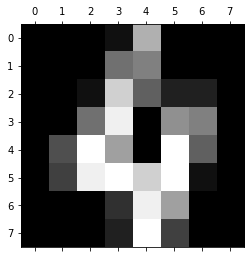

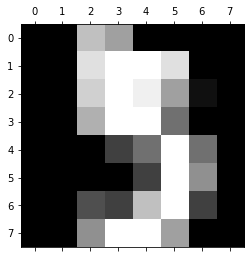

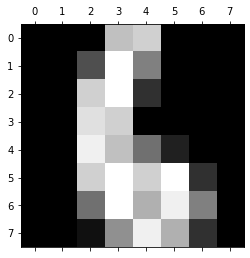

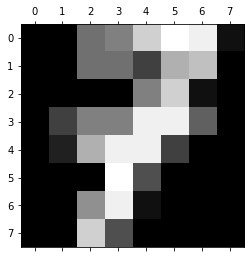

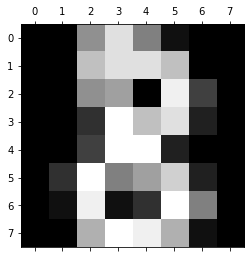

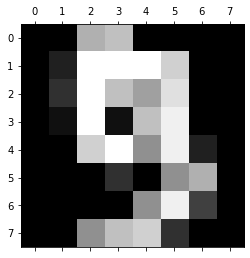

In [4]:
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])
#Pour récupérer les données et les labels :
X = digits.data
y = digits.target

### b) Séparer une fois pour toutes la base initiale en deux : apprentissage (70%) et test (30%) (model_selection.train_test_split).


In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [7]:
X_train=np.array(X_train)
X_test=np.array(X_test)
print ("Nous possédons {} images dans le train composé de {} feature".format(X_train.shape[0],X_train.shape[1]))
print ("Nous possédons {} images dans le test composé de {} feature".format(X_test.shape[0],X_test.shape[1]))

Nous possédons 1257 images dans le train composé de 64 feature
Nous possédons 540 images dans le test composé de 64 feature


## 2. Apprentissage

###### Définir le réseau :
    Entraîner le réseau (fonction fit). Optimiser la structure du réseau de neurones (nombre de cellules en couche cachée). Étudier l’influence du nombre de neurones cachés sur les taux de reconnaissance en apprentissage et en généralisation (fonction score). Conclure sur l’architecture optimale. Vous pouvez modifier les paramètres en fonction des conclusions tirées au TP2

###### clf1 = MLPClassifier(hidden_layer_sizes=C, activation=’tanh’, solver=’sgd’, batch_size=1, alpha=0, learning_rate=’adaptive’, verbose=1)

    Le maximun de neuronne dans la couche cachée est de ... pour éviter le sur apprentisage (Nbr de parametre libre <NB_d'exemple_dans_apprentissage*N(nombre de sortie)
    Nous avons 2 64 classe et 1797 images dans notre base d'apprentisage soit NB_d'exemple_dans_apprentissage*N(nombre de sortie)=17970
    Nbr de parametre libre=C*10+C*64=C*5006 soit C< 17970/74 =24
    
    
    ce nombre etant tres grand et demandant bcp de calcul je me stoperai des que l'accurancy en train et test est supérieur a 95%
    
    et donc des perfomances en test peu satisfaisante. Nous ferons donc varié i de 1 à ... De plus comme lors du tp précédent j'enregistrerai toutes les données dans des excels pour faciliter les calcul en local plus tard

# SGD et learning rate =0.001

la reconnaisssance d'image etant aujourd'hui tres performante j'attends donc un taux de reconnaisance haut, pour mOn programme et etant donné que mon ordinateur et lent a faire les calcul j'estimerai que mon model est correct avec 95 pourcent de réussite en moyenne sur chaque classe. Sachant que un neuronne ne serait pas suffisant je commencerai a 12.  je fais la moyenne sur 10 avec un saut de 3 neuronnes dans ma hiden layer.

In [7]:
'''
import time
score_matrice_train=np.zeros((10,5))
score_matrice_test=np.zeros((10,5))
time_matricefit=np.zeros((10,5))
time_matrice=np.zeros((10,5))
compte_columns=0
for hiden_layer in range(12,25,3):
    for compteur_ligne in range(10):
        model = MLPClassifier(hidden_layer_sizes=hiden_layer,activation='tanh',solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=0,max_iter=100)

       #j'entraine mon model et calcul du temps
        start_time=time.time()
        model.fit(X_train,y_train)
        timefit=time.time() - start_time
        time_matricefit[compteur_ligne][compte_columns]=timefit
        
        
        #time sur le predict 
        start_time2=time.time()
        model.predict(X_test)
        timepredict=time.time() - start_time2
        time_matrice[compteur_ligne][compte_columns]=timepredict
        #je recupere les resultats pour le train
        score_matrice_train[compteur_ligne][compte_columns]=model.score(X_train,y_train)
        #je récupere les résultat pour la base de test
        score_matrice_test[compteur_ligne][compte_columns]=model.score(X_test,y_test)

    
    #je passe a la colonne suivante    
    compte_columns=compte_columns+1
'''


Iteration 1, loss = 1.88459798
Iteration 2, loss = 1.31007215
Iteration 3, loss = 1.07845838
Iteration 4, loss = 1.02901022
Iteration 5, loss = 0.97110549
Iteration 6, loss = 0.81523970
Iteration 7, loss = 0.68208301
Iteration 8, loss = 0.67712412
Iteration 9, loss = 0.66031088
Iteration 10, loss = 0.56567009
Iteration 11, loss = 0.60814138
Iteration 12, loss = 0.62768116
Iteration 13, loss = 0.59644547
Iteration 14, loss = 0.55200551
Iteration 15, loss = 0.73476944
Iteration 16, loss = 0.53765526
Iteration 17, loss = 0.49474585
Iteration 18, loss = 0.44529174
Iteration 19, loss = 0.52453165
Iteration 20, loss = 0.56824336
Iteration 21, loss = 0.40967445
Iteration 22, loss = 0.42290023
Iteration 23, loss = 0.41742243
Iteration 24, loss = 0.41357860
Iteration 25, loss = 0.38987811
Iteration 26, loss = 0.36064060
Iteration 27, loss = 0.41959964
Iteration 28, loss = 0.39004094
Iteration 29, loss = 0.35172782
Iteration 30, loss = 0.34936708
Iteration 31, loss = 0.46197696
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.79578390
Iteration 2, loss = 1.26143385
Iteration 3, loss = 1.18511688
Iteration 4, loss = 1.20011765
Iteration 5, loss = 0.91947312
Iteration 6, loss = 0.81884546
Iteration 7, loss = 0.81213689
Iteration 8, loss = 0.63150869
Iteration 9, loss = 0.65300927
Iteration 10, loss = 0.81978741
Iteration 11, loss = 0.98582884
Iteration 12, loss = 0.96535472
Iteration 13, loss = 0.91581903
Iteration 14, loss = 0.91140641
Iteration 15, loss = 0.85406156
Iteration 16, loss = 0.59374151
Iteration 17, loss = 0.58015218
Iteration 18, loss = 0.50999473
Iteration 19, loss = 0.60828860
Iteration 20, loss = 0.55632925
Iteration 21, loss = 0.56555466
Iteration 22, loss = 0.65877461
Iteration 23, loss = 0.60311164
Iteration 24, loss = 0.52473665
Iteration 25, loss = 0.47203378
Iteration 26, loss = 0.47696623
Iteration 27, loss = 0.52455176
Iteration 28, loss = 0.47179069
Iteration 29, loss = 0.50919773
Iteration 30, loss = 0.52341156
Iteration 31, loss = 0.46138915
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.81852879
Iteration 2, loss = 1.43372408
Iteration 3, loss = 1.26058268
Iteration 4, loss = 1.03001646
Iteration 5, loss = 1.04987502
Iteration 6, loss = 0.86091318
Iteration 7, loss = 0.85378126
Iteration 8, loss = 0.89605021
Iteration 9, loss = 0.78982348
Iteration 10, loss = 0.68396717
Iteration 11, loss = 0.66816497
Iteration 12, loss = 0.62967453
Iteration 13, loss = 0.61265860
Iteration 14, loss = 0.62352868
Iteration 15, loss = 0.56071595
Iteration 16, loss = 0.54093317
Iteration 17, loss = 0.56218825
Iteration 18, loss = 0.56498322
Iteration 19, loss = 0.59741942
Iteration 20, loss = 0.53743538
Iteration 21, loss = 0.57074398
Iteration 22, loss = 0.48863575
Iteration 23, loss = 0.54906506
Iteration 24, loss = 0.47238775
Iteration 25, loss = 0.54811662
Iteration 26, loss = 0.57407585
Iteration 27, loss = 0.50718330
Iteration 28, loss = 0.59396002
Iteration 29, loss = 0.48393239
Iteration 30, loss = 0.47293415
Iteration 31, loss = 0.41220432
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.72988570
Iteration 2, loss = 1.13296545
Iteration 3, loss = 0.87190507
Iteration 4, loss = 0.72656513
Iteration 5, loss = 0.70885811
Iteration 6, loss = 0.66153995
Iteration 7, loss = 0.59748076
Iteration 8, loss = 0.57629623
Iteration 9, loss = 0.63971054
Iteration 10, loss = 0.56519926
Iteration 11, loss = 0.55444790
Iteration 12, loss = 0.48345294
Iteration 13, loss = 0.50013931
Iteration 14, loss = 0.53431480
Iteration 15, loss = 0.55590120
Iteration 16, loss = 0.44012522
Iteration 17, loss = 0.46975922
Iteration 18, loss = 0.46542659
Iteration 19, loss = 0.45727552
Iteration 20, loss = 0.39923730
Iteration 21, loss = 0.43852557
Iteration 22, loss = 0.32846267
Iteration 23, loss = 0.38974019
Iteration 24, loss = 0.60226131
Iteration 25, loss = 0.49143664
Iteration 26, loss = 0.55602256
Iteration 27, loss = 0.46907435
Iteration 28, loss = 0.43834486
Iteration 29, loss = 0.44623984
Iteration 30, loss = 0.38539190
Iteration 31, loss = 0.34562118
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.77348826
Iteration 2, loss = 1.28736781
Iteration 3, loss = 1.00859922
Iteration 4, loss = 0.90879143
Iteration 5, loss = 0.70644660
Iteration 6, loss = 0.73278257
Iteration 7, loss = 0.66431383
Iteration 8, loss = 0.58623251
Iteration 9, loss = 0.63149668
Iteration 10, loss = 0.59105858
Iteration 11, loss = 0.60226163
Iteration 12, loss = 0.59222259
Iteration 13, loss = 0.64154065
Iteration 14, loss = 0.65082615
Iteration 15, loss = 0.55564989
Iteration 16, loss = 0.52267973
Iteration 17, loss = 0.43009777
Iteration 18, loss = 0.49087154
Iteration 19, loss = 0.40952068
Iteration 20, loss = 0.42389940
Iteration 21, loss = 0.52190341
Iteration 22, loss = 0.50747470
Iteration 23, loss = 0.49215652
Iteration 24, loss = 0.47624589
Iteration 25, loss = 0.47482959
Iteration 26, loss = 0.44665542
Iteration 27, loss = 0.41661421
Iteration 28, loss = 0.32271161
Iteration 29, loss = 0.36392920
Iteration 30, loss = 0.33208943
Iteration 31, loss = 0.35567163
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.75595490
Iteration 2, loss = 1.11836576
Iteration 3, loss = 0.92573439
Iteration 4, loss = 0.78450185
Iteration 5, loss = 0.69194167
Iteration 6, loss = 0.62869687
Iteration 7, loss = 0.71961220
Iteration 8, loss = 0.80073932
Iteration 9, loss = 0.63435229
Iteration 10, loss = 0.56267331
Iteration 11, loss = 0.50183096
Iteration 12, loss = 0.49335660
Iteration 13, loss = 0.61788295
Iteration 14, loss = 0.55543434
Iteration 15, loss = 0.49708310
Iteration 16, loss = 0.46122680
Iteration 17, loss = 0.49994591
Iteration 18, loss = 0.46830302
Iteration 19, loss = 0.47739778
Iteration 20, loss = 0.41973750
Iteration 21, loss = 0.39205645
Iteration 22, loss = 0.38497325
Iteration 23, loss = 0.53969347
Iteration 24, loss = 0.39755757
Iteration 25, loss = 0.33116621
Iteration 26, loss = 0.37869257
Iteration 27, loss = 0.45373956
Iteration 28, loss = 0.54216323
Iteration 29, loss = 0.51362080
Iteration 30, loss = 0.55794718
Iteration 31, loss = 0.32501888
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.63753551
Iteration 2, loss = 0.89336749
Iteration 3, loss = 0.70085567
Iteration 4, loss = 0.75875675
Iteration 5, loss = 0.79770263
Iteration 6, loss = 0.67409758
Iteration 7, loss = 0.64687616
Iteration 8, loss = 0.62724008
Iteration 9, loss = 0.51444583
Iteration 10, loss = 0.52610214
Iteration 11, loss = 0.56837536
Iteration 12, loss = 0.43875413
Iteration 13, loss = 0.50659511
Iteration 14, loss = 0.46085412
Iteration 15, loss = 0.62609187
Iteration 16, loss = 0.37377712
Iteration 17, loss = 0.38223015
Iteration 18, loss = 0.46794301
Iteration 19, loss = 0.45119466
Iteration 20, loss = 0.39459673
Iteration 21, loss = 0.34599882
Iteration 22, loss = 0.34994592
Iteration 23, loss = 0.31671661
Iteration 24, loss = 0.29700068
Iteration 25, loss = 0.38563211
Iteration 26, loss = 0.41960811
Iteration 27, loss = 0.35612671
Iteration 28, loss = 0.29499359
Iteration 29, loss = 0.40925585
Iteration 30, loss = 0.29401613
Iteration 31, loss = 0.36999938
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.96424922
Iteration 2, loss = 1.23561002
Iteration 3, loss = 0.86680775
Iteration 4, loss = 0.68745633
Iteration 5, loss = 0.60580368
Iteration 6, loss = 0.52087745
Iteration 7, loss = 0.54489517
Iteration 8, loss = 0.42112133
Iteration 9, loss = 0.59605062
Iteration 10, loss = 0.41065623
Iteration 11, loss = 0.34661999
Iteration 12, loss = 0.33898009
Iteration 13, loss = 0.46399563
Iteration 14, loss = 0.45988590
Iteration 15, loss = 0.30774222
Iteration 16, loss = 0.33744997
Iteration 17, loss = 0.24745237
Iteration 18, loss = 0.21969009
Iteration 19, loss = 0.30972229
Iteration 20, loss = 0.24322021
Iteration 21, loss = 0.31478691
Iteration 22, loss = 0.28820032
Iteration 23, loss = 0.30079709
Iteration 24, loss = 0.29574571
Iteration 25, loss = 0.33665191
Iteration 26, loss = 0.28585789
Iteration 27, loss = 0.32203519
Iteration 28, loss = 0.30878570
Iteration 29, loss = 0.36711372
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.76144106
Iteration 2, loss = 1.29930564
Iteration 3, loss = 0.95406608
Iteration 4, loss = 0.91057413
Iteration 5, loss = 0.81212052
Iteration 6, loss = 0.76279999
Iteration 7, loss = 0.77320922
Iteration 8, loss = 0.67759734
Iteration 9, loss = 0.68956684
Iteration 10, loss = 0.61352112
Iteration 11, loss = 0.65199557
Iteration 12, loss = 0.64548429
Iteration 13, loss = 0.65451943
Iteration 14, loss = 0.56569184
Iteration 15, loss = 0.53128797
Iteration 16, loss = 0.46175859
Iteration 17, loss = 0.55005339
Iteration 18, loss = 0.58794739
Iteration 19, loss = 0.53008929
Iteration 20, loss = 0.42345792
Iteration 21, loss = 0.47036204
Iteration 22, loss = 0.48225629
Iteration 23, loss = 0.41238664
Iteration 24, loss = 0.44619409
Iteration 25, loss = 0.47503051
Iteration 26, loss = 0.45685461
Iteration 27, loss = 0.39415706
Iteration 28, loss = 0.37365707
Iteration 29, loss = 0.34688284
Iteration 30, loss = 0.34962312
Iteration 31, loss = 0.34898115
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.73944522
Iteration 2, loss = 1.09570720
Iteration 3, loss = 0.83777991
Iteration 4, loss = 0.68100213
Iteration 5, loss = 0.67589685
Iteration 6, loss = 0.54060237
Iteration 7, loss = 0.50151357
Iteration 8, loss = 0.48003081
Iteration 9, loss = 0.53833512
Iteration 10, loss = 0.39976414
Iteration 11, loss = 0.39596878
Iteration 12, loss = 0.31294595
Iteration 13, loss = 0.30399887
Iteration 14, loss = 0.39858946
Iteration 15, loss = 0.32893132
Iteration 16, loss = 0.39884392
Iteration 17, loss = 0.31218161
Iteration 18, loss = 0.26771198
Iteration 19, loss = 0.34797611
Iteration 20, loss = 0.40919748
Iteration 21, loss = 0.29691991
Iteration 22, loss = 0.38708135
Iteration 23, loss = 0.30680089
Iteration 24, loss = 0.24814513
Iteration 25, loss = 0.26395040
Iteration 26, loss = 0.29759243
Iteration 27, loss = 0.25921946
Iteration 28, loss = 0.31156340
Iteration 29, loss = 0.21043741
Iteration 30, loss = 0.17728046
Iteration 31, loss = 0.30257535
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.68276675
Iteration 2, loss = 1.11015449
Iteration 3, loss = 0.91945909
Iteration 4, loss = 0.83625621
Iteration 5, loss = 0.63306105
Iteration 6, loss = 0.61875720
Iteration 7, loss = 0.74949554
Iteration 8, loss = 0.62830473
Iteration 9, loss = 0.43968917
Iteration 10, loss = 0.50369658
Iteration 11, loss = 0.44792308
Iteration 12, loss = 0.36405250
Iteration 13, loss = 0.47759197
Iteration 14, loss = 0.41138795
Iteration 15, loss = 0.45353475
Iteration 16, loss = 0.47601271
Iteration 17, loss = 0.39014792
Iteration 18, loss = 0.40365099
Iteration 19, loss = 0.33743302
Iteration 20, loss = 0.34043206
Iteration 21, loss = 0.39599236
Iteration 22, loss = 0.31037030
Iteration 23, loss = 0.30017664
Iteration 24, loss = 0.33205036
Iteration 25, loss = 0.37282323
Iteration 26, loss = 0.28055561
Iteration 27, loss = 0.26508778
Iteration 28, loss = 0.31976400
Iteration 29, loss = 0.29732786
Iteration 30, loss = 0.38547363
Iteration 31, loss = 0.37946544
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.97773079
Iteration 2, loss = 1.41361646
Iteration 3, loss = 0.92382358
Iteration 4, loss = 0.83079444
Iteration 5, loss = 0.64743503
Iteration 6, loss = 0.63923388
Iteration 7, loss = 0.52930507
Iteration 8, loss = 0.58200849
Iteration 9, loss = 0.53122784
Iteration 10, loss = 0.48219296
Iteration 11, loss = 0.47979788
Iteration 12, loss = 0.63802705
Iteration 13, loss = 0.49311859
Iteration 14, loss = 0.43322837
Iteration 15, loss = 0.48654910
Iteration 16, loss = 0.39092913
Iteration 17, loss = 0.45007185
Iteration 18, loss = 0.36610177
Iteration 19, loss = 0.38719980
Iteration 20, loss = 0.31620058
Iteration 21, loss = 0.35468674
Iteration 22, loss = 0.36570901
Iteration 23, loss = 0.41150676
Iteration 24, loss = 0.34875796
Iteration 25, loss = 0.34877921
Iteration 26, loss = 0.35682093
Iteration 27, loss = 0.45489268
Iteration 28, loss = 0.30441149
Iteration 29, loss = 0.22558932
Iteration 30, loss = 0.27520935
Iteration 31, loss = 0.25300186
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.62301897
Iteration 2, loss = 0.96218780
Iteration 3, loss = 0.82659582
Iteration 4, loss = 0.70490474
Iteration 5, loss = 0.75345564
Iteration 6, loss = 0.52926728
Iteration 7, loss = 0.50595480
Iteration 8, loss = 0.54668946
Iteration 9, loss = 0.45933375
Iteration 10, loss = 0.43443196
Iteration 11, loss = 0.38767139
Iteration 12, loss = 0.41818797
Iteration 13, loss = 0.40940260
Iteration 14, loss = 0.42296369
Iteration 15, loss = 0.40993385
Iteration 16, loss = 0.39528548
Iteration 17, loss = 0.32424692
Iteration 18, loss = 0.27695371
Iteration 19, loss = 0.39757689
Iteration 20, loss = 0.26303478
Iteration 21, loss = 0.33712212
Iteration 22, loss = 0.26611202
Iteration 23, loss = 0.29854938
Iteration 24, loss = 0.36780121
Iteration 25, loss = 0.35478214
Iteration 26, loss = 0.32085361
Iteration 27, loss = 0.35248290
Iteration 28, loss = 0.33809169
Iteration 29, loss = 0.40101431
Iteration 30, loss = 0.24425125
Iteration 31, loss = 0.22274013
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.73868182
Iteration 2, loss = 1.07995342
Iteration 3, loss = 0.71265242
Iteration 4, loss = 0.57935787
Iteration 5, loss = 0.50372271
Iteration 6, loss = 0.61976335
Iteration 7, loss = 0.55200746
Iteration 8, loss = 0.56100193
Iteration 9, loss = 0.47931132
Iteration 10, loss = 0.42013716
Iteration 11, loss = 0.45843319
Iteration 12, loss = 0.46722077
Iteration 13, loss = 0.45738403
Iteration 14, loss = 0.46817780
Iteration 15, loss = 0.49190101
Iteration 16, loss = 0.45863447
Iteration 17, loss = 0.39862742
Iteration 18, loss = 0.40518991
Iteration 19, loss = 0.35076205
Iteration 20, loss = 0.33453078
Iteration 21, loss = 0.47251208
Iteration 22, loss = 0.49659570
Iteration 23, loss = 0.43988271
Iteration 24, loss = 0.41535916
Iteration 25, loss = 0.36935314
Iteration 26, loss = 0.34333537
Iteration 27, loss = 0.41987795
Iteration 28, loss = 0.39540203
Iteration 29, loss = 0.36030454
Iteration 30, loss = 0.42252297
Iteration 31, loss = 0.32653831
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.68644457
Iteration 2, loss = 1.17968049
Iteration 3, loss = 0.99774579
Iteration 4, loss = 0.85971781
Iteration 5, loss = 0.80358561
Iteration 6, loss = 0.80198002
Iteration 7, loss = 0.61078952
Iteration 8, loss = 0.57323708
Iteration 9, loss = 0.52926045
Iteration 10, loss = 0.45281481
Iteration 11, loss = 0.43365970
Iteration 12, loss = 0.52765010
Iteration 13, loss = 0.48400228
Iteration 14, loss = 0.64928626
Iteration 15, loss = 0.59002085
Iteration 16, loss = 0.46322385
Iteration 17, loss = 0.36803186
Iteration 18, loss = 0.37700702
Iteration 19, loss = 0.37619222
Iteration 20, loss = 0.34616904
Iteration 21, loss = 0.35771351
Iteration 22, loss = 0.36700575
Iteration 23, loss = 0.33431227
Iteration 24, loss = 0.36656727
Iteration 25, loss = 0.34058877
Iteration 26, loss = 0.34233115
Iteration 27, loss = 0.29190810
Iteration 28, loss = 0.31759922
Iteration 29, loss = 0.30168487
Iteration 30, loss = 0.38196256
Iteration 31, loss = 0.33226226
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.62257475
Iteration 2, loss = 0.96596189
Iteration 3, loss = 0.77537791
Iteration 4, loss = 0.75963107
Iteration 5, loss = 0.59183510
Iteration 6, loss = 0.48162191
Iteration 7, loss = 0.50705883
Iteration 8, loss = 0.52519199
Iteration 9, loss = 0.34592534
Iteration 10, loss = 0.34499692
Iteration 11, loss = 0.34898012
Iteration 12, loss = 0.38766475
Iteration 13, loss = 0.28650483
Iteration 14, loss = 0.26373872
Iteration 15, loss = 0.36427102
Iteration 16, loss = 0.27834923
Iteration 17, loss = 0.30925333
Iteration 18, loss = 0.24516850
Iteration 19, loss = 0.27283426
Iteration 20, loss = 0.37390665
Iteration 21, loss = 0.25228476
Iteration 22, loss = 0.19871185
Iteration 23, loss = 0.27235299
Iteration 24, loss = 0.27871311
Iteration 25, loss = 0.16890070
Iteration 26, loss = 0.17145291
Iteration 27, loss = 0.23046341
Iteration 28, loss = 0.32195230
Iteration 29, loss = 0.19730783
Iteration 30, loss = 0.16696614
Iteration 31, loss = 0.19714404
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.59996134
Iteration 2, loss = 0.95500950
Iteration 3, loss = 0.81998763
Iteration 4, loss = 0.67418440
Iteration 5, loss = 0.73784638
Iteration 6, loss = 0.77672681
Iteration 7, loss = 0.56580756
Iteration 8, loss = 0.67678041
Iteration 9, loss = 0.57379284
Iteration 10, loss = 0.59652449
Iteration 11, loss = 0.43494052
Iteration 12, loss = 0.49138516
Iteration 13, loss = 0.50515902
Iteration 14, loss = 0.50373623
Iteration 15, loss = 0.44467062
Iteration 16, loss = 0.44577150
Iteration 17, loss = 0.43774766
Iteration 18, loss = 0.34763384
Iteration 19, loss = 0.42794374
Iteration 20, loss = 0.43758273
Iteration 21, loss = 0.41644353
Iteration 22, loss = 0.34828768
Iteration 23, loss = 0.36369770
Iteration 24, loss = 0.35512570
Iteration 25, loss = 0.42508178
Iteration 26, loss = 0.43966970
Iteration 27, loss = 0.30973792
Iteration 28, loss = 0.35152753
Iteration 29, loss = 0.33334158
Iteration 30, loss = 0.30508478
Iteration 31, loss = 0.36273061
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.53966381
Iteration 2, loss = 0.97436055
Iteration 3, loss = 0.80620159
Iteration 4, loss = 0.68270731
Iteration 5, loss = 0.62931404
Iteration 6, loss = 0.68121904
Iteration 7, loss = 0.56335007
Iteration 8, loss = 0.51542182
Iteration 9, loss = 0.60409335
Iteration 10, loss = 0.56720065
Iteration 11, loss = 0.61945010
Iteration 12, loss = 0.43942945
Iteration 13, loss = 0.40678274
Iteration 14, loss = 0.46114112
Iteration 15, loss = 0.44633272
Iteration 16, loss = 0.50363713
Iteration 17, loss = 0.42122629
Iteration 18, loss = 0.41976258
Iteration 19, loss = 0.46360859
Iteration 20, loss = 0.50701687
Iteration 21, loss = 0.41653786
Iteration 22, loss = 0.34329599
Iteration 23, loss = 0.30277453
Iteration 24, loss = 0.32853658
Iteration 25, loss = 0.35416840
Iteration 26, loss = 0.32550904
Iteration 27, loss = 0.25791296
Iteration 28, loss = 0.23894797
Iteration 29, loss = 0.29437468
Iteration 30, loss = 0.27558904
Iteration 31, loss = 0.40772046
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.59823740
Iteration 2, loss = 0.98848865
Iteration 3, loss = 0.92793112
Iteration 4, loss = 0.70538981
Iteration 5, loss = 0.64913415
Iteration 6, loss = 0.65177253
Iteration 7, loss = 0.61833157
Iteration 8, loss = 0.59068545
Iteration 9, loss = 0.54229071
Iteration 10, loss = 0.56022878
Iteration 11, loss = 0.51236818
Iteration 12, loss = 0.51860669
Iteration 13, loss = 0.64094569
Iteration 14, loss = 0.49672293
Iteration 15, loss = 0.60562166
Iteration 16, loss = 0.40270769
Iteration 17, loss = 0.43109738
Iteration 18, loss = 0.34808068
Iteration 19, loss = 0.44918184
Iteration 20, loss = 0.43186595
Iteration 21, loss = 0.49598619
Iteration 22, loss = 0.37558011
Iteration 23, loss = 0.38797929
Iteration 24, loss = 0.48920956
Iteration 25, loss = 0.36569952
Iteration 26, loss = 0.35859698
Iteration 27, loss = 0.30896405
Iteration 28, loss = 0.35609147
Iteration 29, loss = 0.37311106
Iteration 30, loss = 0.30561778
Iteration 31, loss = 0.26070503
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.93908944
Iteration 2, loss = 1.61547393
Iteration 3, loss = 1.37167262
Iteration 4, loss = 1.11291855
Iteration 5, loss = 0.87463377
Iteration 6, loss = 0.90712807
Iteration 7, loss = 0.72776304
Iteration 8, loss = 0.72867740
Iteration 9, loss = 0.76992332
Iteration 10, loss = 0.57726902
Iteration 11, loss = 0.61448752
Iteration 12, loss = 0.58423370
Iteration 13, loss = 0.62445917
Iteration 14, loss = 0.64957709
Iteration 15, loss = 0.76273539
Iteration 16, loss = 0.64040891
Iteration 17, loss = 0.48538147
Iteration 18, loss = 0.58617121
Iteration 19, loss = 0.72343416
Iteration 20, loss = 0.63314376
Iteration 21, loss = 0.47856813
Iteration 22, loss = 0.52926932
Iteration 23, loss = 0.48337155
Iteration 24, loss = 0.53029108
Iteration 25, loss = 0.51057152
Iteration 26, loss = 0.61638198
Iteration 27, loss = 0.50666646
Iteration 28, loss = 0.52109853
Iteration 29, loss = 0.53360949
Iteration 30, loss = 0.50100662
Iteration 31, loss = 0.43838767
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.50413188
Iteration 2, loss = 0.86079199
Iteration 3, loss = 0.65965269
Iteration 4, loss = 0.57016606
Iteration 5, loss = 0.46779672
Iteration 6, loss = 0.50381372
Iteration 7, loss = 0.42723062
Iteration 8, loss = 0.37582088
Iteration 9, loss = 0.37471794
Iteration 10, loss = 0.44188324
Iteration 11, loss = 0.54571918
Iteration 12, loss = 0.35505893
Iteration 13, loss = 0.31269978
Iteration 14, loss = 0.34887554
Iteration 15, loss = 0.46034665
Iteration 16, loss = 0.39602117
Iteration 17, loss = 0.33622181
Iteration 18, loss = 0.31082301
Iteration 19, loss = 0.26414337
Iteration 20, loss = 0.38344673
Iteration 21, loss = 0.30697255
Iteration 22, loss = 0.27602069
Iteration 23, loss = 0.22689654
Iteration 24, loss = 0.27154997
Iteration 25, loss = 0.24770208
Iteration 26, loss = 0.30442681
Iteration 27, loss = 0.25807911
Iteration 28, loss = 0.25397152
Iteration 29, loss = 0.26741386
Iteration 30, loss = 0.33744724
Iteration 31, loss = 0.26325958
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.40804277
Iteration 2, loss = 0.79305119
Iteration 3, loss = 0.52134445
Iteration 4, loss = 0.43975195
Iteration 5, loss = 0.47642265
Iteration 6, loss = 0.41275326
Iteration 7, loss = 0.42033187
Iteration 8, loss = 0.32517005
Iteration 9, loss = 0.38793054
Iteration 10, loss = 0.48761192
Iteration 11, loss = 0.45736060
Iteration 12, loss = 0.38394643
Iteration 13, loss = 0.35598658
Iteration 14, loss = 0.32859627
Iteration 15, loss = 0.31074052
Iteration 16, loss = 0.34459730
Iteration 17, loss = 0.33378611
Iteration 18, loss = 0.29710471
Iteration 19, loss = 0.40377659
Iteration 20, loss = 0.40563302
Iteration 21, loss = 0.34638130
Iteration 22, loss = 0.37546590
Iteration 23, loss = 0.28159517
Iteration 24, loss = 0.30464856
Iteration 25, loss = 0.22949300
Iteration 26, loss = 0.27712548
Iteration 27, loss = 0.27789449
Iteration 28, loss = 0.19912046
Iteration 29, loss = 0.21407289
Iteration 30, loss = 0.23960021
Iteration 31, loss = 0.25373417
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.67667552
Iteration 2, loss = 0.97492547
Iteration 3, loss = 0.83735280
Iteration 4, loss = 0.65659093
Iteration 5, loss = 0.55401183
Iteration 6, loss = 0.51407672
Iteration 7, loss = 0.45092169
Iteration 8, loss = 0.35812524
Iteration 9, loss = 0.42242906
Iteration 10, loss = 0.40245721
Iteration 11, loss = 0.40097921
Iteration 12, loss = 0.37281478
Iteration 13, loss = 0.31830955
Iteration 14, loss = 0.29244279
Iteration 15, loss = 0.33248845
Iteration 16, loss = 0.28777467
Iteration 17, loss = 0.34405005
Iteration 18, loss = 0.43215224
Iteration 19, loss = 0.46888956
Iteration 20, loss = 0.38634604
Iteration 21, loss = 0.32333898
Iteration 22, loss = 0.25545957
Iteration 23, loss = 0.22259230
Iteration 24, loss = 0.25236755
Iteration 25, loss = 0.20305311
Iteration 26, loss = 0.25420428
Iteration 27, loss = 0.22562098
Iteration 28, loss = 0.43862304
Iteration 29, loss = 0.41607808
Iteration 30, loss = 0.35998923
Iteration 31, loss = 0.29929988
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.68477080
Iteration 2, loss = 0.99006104
Iteration 3, loss = 0.74996448
Iteration 4, loss = 0.68063870
Iteration 5, loss = 0.65765223
Iteration 6, loss = 0.52246987
Iteration 7, loss = 0.60023087
Iteration 8, loss = 0.54837607
Iteration 9, loss = 0.45138169
Iteration 10, loss = 0.55800327
Iteration 11, loss = 0.51516254
Iteration 12, loss = 0.52411894
Iteration 13, loss = 0.44618596
Iteration 14, loss = 0.50993520
Iteration 15, loss = 0.40730973
Iteration 16, loss = 0.40986773
Iteration 17, loss = 0.35674700
Iteration 18, loss = 0.37628308
Iteration 19, loss = 0.27051620
Iteration 20, loss = 0.27841942
Iteration 21, loss = 0.35060097
Iteration 22, loss = 0.36732118
Iteration 23, loss = 0.32466746
Iteration 24, loss = 0.32321081
Iteration 25, loss = 0.25821343
Iteration 26, loss = 0.25491029
Iteration 27, loss = 0.27201468
Iteration 28, loss = 0.21723860
Iteration 29, loss = 0.21096002
Iteration 30, loss = 0.22087670
Iteration 31, loss = 0.19055501
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.68523782
Iteration 2, loss = 1.24399174
Iteration 3, loss = 0.89600047
Iteration 4, loss = 0.65840100
Iteration 5, loss = 0.60611751
Iteration 6, loss = 0.42211430
Iteration 7, loss = 0.33376516
Iteration 8, loss = 0.42986302
Iteration 9, loss = 0.43962624
Iteration 10, loss = 0.41675696
Iteration 11, loss = 0.45620161
Iteration 12, loss = 0.34224701
Iteration 13, loss = 0.37539417
Iteration 14, loss = 0.39740127
Iteration 15, loss = 0.39156556
Iteration 16, loss = 0.41640145
Iteration 17, loss = 0.26600365
Iteration 18, loss = 0.26613362
Iteration 19, loss = 0.30673777
Iteration 20, loss = 0.34968390
Iteration 21, loss = 0.37770795
Iteration 22, loss = 0.32156862
Iteration 23, loss = 0.31023055
Iteration 24, loss = 0.34619061
Iteration 25, loss = 0.24489334
Iteration 26, loss = 0.25392964
Iteration 27, loss = 0.20954641
Iteration 28, loss = 0.21019963
Iteration 29, loss = 0.28799445
Iteration 30, loss = 0.25556257
Iteration 31, loss = 0.26417821
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.48706775
Iteration 2, loss = 0.81414827
Iteration 3, loss = 0.78492835
Iteration 4, loss = 0.58551022
Iteration 5, loss = 0.54521908
Iteration 6, loss = 0.52873040
Iteration 7, loss = 0.51658853
Iteration 8, loss = 0.53941594
Iteration 9, loss = 0.46384613
Iteration 10, loss = 0.40897386
Iteration 11, loss = 0.38856177
Iteration 12, loss = 0.31897256
Iteration 13, loss = 0.36699552
Iteration 14, loss = 0.43040435
Iteration 15, loss = 0.39789227
Iteration 16, loss = 0.45820244
Iteration 17, loss = 0.40895127
Iteration 18, loss = 0.38983467
Iteration 19, loss = 0.43813205
Iteration 20, loss = 0.37416070
Iteration 21, loss = 0.31573588
Iteration 22, loss = 0.27038947
Iteration 23, loss = 0.33334954
Iteration 24, loss = 0.40219542
Iteration 25, loss = 0.33659099
Iteration 26, loss = 0.29633903
Iteration 27, loss = 0.36603101
Iteration 28, loss = 0.50106892
Iteration 29, loss = 0.35578972
Iteration 30, loss = 0.34559446
Iteration 31, loss = 0.22095085
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.56115121
Iteration 2, loss = 0.91314127
Iteration 3, loss = 0.71655902
Iteration 4, loss = 0.70216802
Iteration 5, loss = 0.64794662
Iteration 6, loss = 0.61791985
Iteration 7, loss = 0.56237612
Iteration 8, loss = 0.43652215
Iteration 9, loss = 0.60232119
Iteration 10, loss = 0.46842726
Iteration 11, loss = 0.38277730
Iteration 12, loss = 0.38810751
Iteration 13, loss = 0.39564676
Iteration 14, loss = 0.40743229
Iteration 15, loss = 0.50641753
Iteration 16, loss = 0.41054260
Iteration 17, loss = 0.27459368
Iteration 18, loss = 0.36685731
Iteration 19, loss = 0.44712414
Iteration 20, loss = 0.38616771
Iteration 21, loss = 0.29432929
Iteration 22, loss = 0.31734395
Iteration 23, loss = 0.22573785
Iteration 24, loss = 0.35418208
Iteration 25, loss = 0.27938144
Iteration 26, loss = 0.21587293
Iteration 27, loss = 0.20343855
Iteration 28, loss = 0.28601328
Iteration 29, loss = 0.21476973
Iteration 30, loss = 0.19396949
Iteration 31, loss = 0.30061693
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.57094357
Iteration 2, loss = 0.95881769
Iteration 3, loss = 0.83578645
Iteration 4, loss = 0.69749950
Iteration 5, loss = 0.70992069
Iteration 6, loss = 0.61785309
Iteration 7, loss = 0.58976568
Iteration 8, loss = 0.46553437
Iteration 9, loss = 0.49885060
Iteration 10, loss = 0.52639931
Iteration 11, loss = 0.50393200
Iteration 12, loss = 0.43369391
Iteration 13, loss = 0.45601949
Iteration 14, loss = 0.34757584
Iteration 15, loss = 0.45829769
Iteration 16, loss = 0.38685564
Iteration 17, loss = 0.38614587
Iteration 18, loss = 0.37707989
Iteration 19, loss = 0.38080760
Iteration 20, loss = 0.35760029
Iteration 21, loss = 0.32026806
Iteration 22, loss = 0.40921927
Iteration 23, loss = 0.43654860
Iteration 24, loss = 0.37156910
Iteration 25, loss = 0.42989976
Iteration 26, loss = 0.39536865
Iteration 27, loss = 0.49875587
Iteration 28, loss = 0.47227968
Iteration 29, loss = 0.32758033
Iteration 30, loss = 0.31906614
Iteration 31, loss = 0.29437140
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.63089645
Iteration 2, loss = 1.06270918
Iteration 3, loss = 0.91026089
Iteration 4, loss = 0.72104913
Iteration 5, loss = 0.62919617
Iteration 6, loss = 0.54833328
Iteration 7, loss = 0.55491071
Iteration 8, loss = 0.48532728
Iteration 9, loss = 0.65426977
Iteration 10, loss = 0.43994526
Iteration 11, loss = 0.40651815
Iteration 12, loss = 0.44782122
Iteration 13, loss = 0.52390417
Iteration 14, loss = 0.55341994
Iteration 15, loss = 0.49527984
Iteration 16, loss = 0.56043062
Iteration 17, loss = 0.63365811
Iteration 18, loss = 0.51211958
Iteration 19, loss = 0.61374354
Iteration 20, loss = 0.61577006
Iteration 21, loss = 0.50149036
Iteration 22, loss = 0.61024360
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 23, loss = 0.56447622
Iteration 24, loss = 0.43766512
Iteration 25, loss = 0.39025197
Iteration 26, loss = 0.37597768
Iteration 27, loss = 0.35144886
Iteration 28, loss = 0.34509908

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.50115893
Iteration 2, loss = 0.84049456
Iteration 3, loss = 0.68313839
Iteration 4, loss = 0.64028247
Iteration 5, loss = 0.60058450
Iteration 6, loss = 0.75005639
Iteration 7, loss = 0.56055903
Iteration 8, loss = 0.46794254
Iteration 9, loss = 0.45333073
Iteration 10, loss = 0.41731068
Iteration 11, loss = 0.36518300
Iteration 12, loss = 0.40907866
Iteration 13, loss = 0.39301659
Iteration 14, loss = 0.36768134
Iteration 15, loss = 0.31313754
Iteration 16, loss = 0.40004784
Iteration 17, loss = 0.28085279
Iteration 18, loss = 0.42683353
Iteration 19, loss = 0.33674626
Iteration 20, loss = 0.37347421
Iteration 21, loss = 0.31085984
Iteration 22, loss = 0.27130599
Iteration 23, loss = 0.27565067
Iteration 24, loss = 0.21843474
Iteration 25, loss = 0.21877438
Iteration 26, loss = 0.23601246
Iteration 27, loss = 0.25313337
Iteration 28, loss = 0.30292373
Iteration 29, loss = 0.45008674
Iteration 30, loss = 0.29970810
Iteration 31, loss = 0.29430081
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.30422082
Iteration 2, loss = 0.73901445
Iteration 3, loss = 0.62319357
Iteration 4, loss = 0.54147685
Iteration 5, loss = 0.47047853
Iteration 6, loss = 0.48607000
Iteration 7, loss = 0.41746889
Iteration 8, loss = 0.45767500
Iteration 9, loss = 0.51422577
Iteration 10, loss = 0.34852118
Iteration 11, loss = 0.42916721
Iteration 12, loss = 0.57241173
Iteration 13, loss = 0.54460628
Iteration 14, loss = 0.42723007
Iteration 15, loss = 0.36463016
Iteration 16, loss = 0.29558210
Iteration 17, loss = 0.42010594
Iteration 18, loss = 0.34281445
Iteration 19, loss = 0.21217077
Iteration 20, loss = 0.21017771
Iteration 21, loss = 0.19909506
Iteration 22, loss = 0.24293272
Iteration 23, loss = 0.31183367
Iteration 24, loss = 0.31961356
Iteration 25, loss = 0.28867074
Iteration 26, loss = 0.32717826
Iteration 27, loss = 0.21018387
Iteration 28, loss = 0.22131014
Iteration 29, loss = 0.29875966
Iteration 30, loss = 0.36348193
Iteration 31, loss = 0.26831250
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.43187406
Iteration 2, loss = 0.75319177
Iteration 3, loss = 0.58294095
Iteration 4, loss = 0.51510183
Iteration 5, loss = 0.53137763
Iteration 6, loss = 0.53009187
Iteration 7, loss = 0.37460175
Iteration 8, loss = 0.41293724
Iteration 9, loss = 0.40883403
Iteration 10, loss = 0.42271634
Iteration 11, loss = 0.33517613
Iteration 12, loss = 0.31951207
Iteration 13, loss = 0.27363223
Iteration 14, loss = 0.37196997
Iteration 15, loss = 0.34048524
Iteration 16, loss = 0.30029686
Iteration 17, loss = 0.27955124
Iteration 18, loss = 0.25607691
Iteration 19, loss = 0.23431150
Iteration 20, loss = 0.16239474
Iteration 21, loss = 0.29796025
Iteration 22, loss = 0.25161636
Iteration 23, loss = 0.25542098
Iteration 24, loss = 0.16733884
Iteration 25, loss = 0.22245598
Iteration 26, loss = 0.24706492
Iteration 27, loss = 0.20380371
Iteration 28, loss = 0.24696314
Iteration 29, loss = 0.25384889
Iteration 30, loss = 0.19922778
Iteration 31, loss = 0.26787931
Training loss did

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.53097159
Iteration 2, loss = 0.90811616
Iteration 3, loss = 0.63211051
Iteration 4, loss = 0.71663505
Iteration 5, loss = 0.47535494
Iteration 6, loss = 0.44653381
Iteration 7, loss = 0.50964935
Iteration 8, loss = 0.46967648
Iteration 9, loss = 0.39949030
Iteration 10, loss = 0.39941610
Iteration 11, loss = 0.44381804
Iteration 12, loss = 0.31965560
Iteration 13, loss = 0.34441612
Iteration 14, loss = 0.40656824
Iteration 15, loss = 0.30100504
Iteration 16, loss = 0.33536512
Iteration 17, loss = 0.42414750
Iteration 18, loss = 0.38056683
Iteration 19, loss = 0.45058584
Iteration 20, loss = 0.35762919
Iteration 21, loss = 0.32776830
Iteration 22, loss = 0.33208445
Iteration 23, loss = 0.28809871
Iteration 24, loss = 0.28968358
Iteration 25, loss = 0.21912308
Iteration 26, loss = 0.25284666
Iteration 27, loss = 0.22447360
Iteration 28, loss = 0.28146733
Iteration 29, loss = 0.28105314
Iteration 30, loss = 0.23013416
Iteration 31, loss = 0.27161059
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.63415649
Iteration 2, loss = 0.84719144
Iteration 3, loss = 0.75691092
Iteration 4, loss = 0.65403824
Iteration 5, loss = 0.54734963
Iteration 6, loss = 0.57531999
Iteration 7, loss = 0.35539481
Iteration 8, loss = 0.35250158
Iteration 9, loss = 0.40042245
Iteration 10, loss = 0.32860366
Iteration 11, loss = 0.28592496
Iteration 12, loss = 0.34460724
Iteration 13, loss = 0.41143563
Iteration 14, loss = 0.57128493
Iteration 15, loss = 0.53130357
Iteration 16, loss = 0.39809264
Iteration 17, loss = 0.38730593
Iteration 18, loss = 0.35591111
Iteration 19, loss = 0.34449348
Iteration 20, loss = 0.29110911
Iteration 21, loss = 0.39243170
Iteration 22, loss = 0.34980848
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 23, loss = 0.24965817
Iteration 24, loss = 0.21651076
Iteration 25, loss = 0.20994613
Iteration 26, loss = 0.17510373
Iteration 27, loss = 0.16073579
Iteration 28, loss = 0.15817830

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.28924057
Iteration 2, loss = 0.69735199
Iteration 3, loss = 0.52392543
Iteration 4, loss = 0.51875054
Iteration 5, loss = 0.54374995
Iteration 6, loss = 0.46248508
Iteration 7, loss = 0.43374321
Iteration 8, loss = 0.38227525
Iteration 9, loss = 0.32224998
Iteration 10, loss = 0.30884384
Iteration 11, loss = 0.36740558
Iteration 12, loss = 0.45593626
Iteration 13, loss = 0.56771051
Iteration 14, loss = 0.43475279
Iteration 15, loss = 0.35389492
Iteration 16, loss = 0.30818771
Iteration 17, loss = 0.31066671
Iteration 18, loss = 0.31652328
Iteration 19, loss = 0.31245218
Iteration 20, loss = 0.41840148
Iteration 21, loss = 0.31801021
Iteration 22, loss = 0.44716770
Iteration 23, loss = 0.29051345
Iteration 24, loss = 0.21747431
Iteration 25, loss = 0.24526125
Iteration 26, loss = 0.30291001
Iteration 27, loss = 0.25158726
Iteration 28, loss = 0.21266695
Iteration 29, loss = 0.26859874
Iteration 30, loss = 0.32534769
Iteration 31, loss = 0.25465830
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.87781929
Iteration 2, loss = 1.18640640
Iteration 3, loss = 0.93589978
Iteration 4, loss = 0.69229949
Iteration 5, loss = 0.55656186
Iteration 6, loss = 0.67983734
Iteration 7, loss = 0.62022862
Iteration 8, loss = 0.60476312
Iteration 9, loss = 0.47526569
Iteration 10, loss = 0.43650788
Iteration 11, loss = 0.41927157
Iteration 12, loss = 0.45810574
Iteration 13, loss = 0.50374858
Iteration 14, loss = 0.37965134
Iteration 15, loss = 0.41470965
Iteration 16, loss = 0.39214809
Iteration 17, loss = 0.33804367
Iteration 18, loss = 0.33743749
Iteration 19, loss = 0.38159553
Iteration 20, loss = 0.36319398
Iteration 21, loss = 0.36373818
Iteration 22, loss = 0.29921309
Iteration 23, loss = 0.44813345
Iteration 24, loss = 0.39204936
Iteration 25, loss = 0.26041221
Iteration 26, loss = 0.29620910
Iteration 27, loss = 0.44661937
Iteration 28, loss = 0.46858191
Iteration 29, loss = 0.52704133
Iteration 30, loss = 0.39452334
Iteration 31, loss = 0.36058720
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.34026222
Iteration 2, loss = 0.72347899
Iteration 3, loss = 0.68161615
Iteration 4, loss = 0.66087388
Iteration 5, loss = 0.70456862
Iteration 6, loss = 0.73338956
Iteration 7, loss = 0.61872851
Iteration 8, loss = 0.55547575
Iteration 9, loss = 0.55765984
Iteration 10, loss = 0.57014524
Iteration 11, loss = 0.51481886
Iteration 12, loss = 0.51265062
Iteration 13, loss = 0.54770253
Iteration 14, loss = 0.53417178
Iteration 15, loss = 0.59245658
Iteration 16, loss = 0.46732407
Iteration 17, loss = 0.42860149
Iteration 18, loss = 0.33928931
Iteration 19, loss = 0.37186652
Iteration 20, loss = 0.34516296
Iteration 21, loss = 0.40256681
Iteration 22, loss = 0.33267029
Iteration 23, loss = 0.27696944
Iteration 24, loss = 0.30592420
Iteration 25, loss = 0.25074022
Iteration 26, loss = 0.29913860
Iteration 27, loss = 0.26701639
Iteration 28, loss = 0.28975687
Iteration 29, loss = 0.26783965
Iteration 30, loss = 0.27042215
Iteration 31, loss = 0.29642443
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.59604794
Iteration 2, loss = 0.83956623
Iteration 3, loss = 0.64341958
Iteration 4, loss = 0.54874171
Iteration 5, loss = 0.65825527
Iteration 6, loss = 0.57245631
Iteration 7, loss = 0.44485642
Iteration 8, loss = 0.44644487
Iteration 9, loss = 0.47804415
Iteration 10, loss = 0.58152834
Iteration 11, loss = 0.38554260
Iteration 12, loss = 0.34789969
Iteration 13, loss = 0.39181112
Iteration 14, loss = 0.41099057
Iteration 15, loss = 0.42181222
Iteration 16, loss = 0.33254399
Iteration 17, loss = 0.37306021
Iteration 18, loss = 0.30698730
Iteration 19, loss = 0.27251340
Iteration 20, loss = 0.25276877
Iteration 21, loss = 0.32692514
Iteration 22, loss = 0.24926850
Iteration 23, loss = 0.22017563
Iteration 24, loss = 0.25985896
Iteration 25, loss = 0.37179185
Iteration 26, loss = 0.42098683
Iteration 27, loss = 0.30329216
Iteration 28, loss = 0.26377162
Iteration 29, loss = 0.38953649
Iteration 30, loss = 0.35174145
Iteration 31, loss = 0.37592414
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.53667413
Iteration 2, loss = 0.74611504
Iteration 3, loss = 0.57467319
Iteration 4, loss = 0.60684970
Iteration 5, loss = 0.53008526
Iteration 6, loss = 0.41816589
Iteration 7, loss = 0.49489510
Iteration 8, loss = 0.43764215
Iteration 9, loss = 0.37081624
Iteration 10, loss = 0.36071507
Iteration 11, loss = 0.40401803
Iteration 12, loss = 0.37248625
Iteration 13, loss = 0.43940104
Iteration 14, loss = 0.45553603
Iteration 15, loss = 0.37044298
Iteration 16, loss = 0.42870047
Iteration 17, loss = 0.39842206
Iteration 18, loss = 0.29866122
Iteration 19, loss = 0.37653171
Iteration 20, loss = 0.40173186
Iteration 21, loss = 0.36927462
Iteration 22, loss = 0.33247724
Iteration 23, loss = 0.29764640
Iteration 24, loss = 0.29424115
Iteration 25, loss = 0.32084179
Iteration 26, loss = 0.35986068
Iteration 27, loss = 0.29220491
Iteration 28, loss = 0.35302086
Iteration 29, loss = 0.21647200
Iteration 30, loss = 0.28690168
Iteration 31, loss = 0.28396280
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.63014444
Iteration 2, loss = 0.97190496
Iteration 3, loss = 0.69565736
Iteration 4, loss = 0.57575195
Iteration 5, loss = 0.63198906
Iteration 6, loss = 0.52451290
Iteration 7, loss = 0.49714536
Iteration 8, loss = 0.44428198
Iteration 9, loss = 0.48221688
Iteration 10, loss = 0.40122242
Iteration 11, loss = 0.39885390
Iteration 12, loss = 0.39581922
Iteration 13, loss = 0.33381985
Iteration 14, loss = 0.32944119
Iteration 15, loss = 0.25169218
Iteration 16, loss = 0.30454413
Iteration 17, loss = 0.33417279
Iteration 18, loss = 0.35407679
Iteration 19, loss = 0.25800230
Iteration 20, loss = 0.27354420
Iteration 21, loss = 0.21581765
Iteration 22, loss = 0.20735601
Iteration 23, loss = 0.27494918
Iteration 24, loss = 0.40941409
Iteration 25, loss = 0.35958664
Iteration 26, loss = 0.45813811
Iteration 27, loss = 0.29171540
Iteration 28, loss = 0.32378144
Iteration 29, loss = 0.36802285
Iteration 30, loss = 0.23143839
Iteration 31, loss = 0.25241375
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.51376520
Iteration 2, loss = 0.78484528
Iteration 3, loss = 0.63120354
Iteration 4, loss = 0.60107143
Iteration 5, loss = 0.52384386
Iteration 6, loss = 0.41745845
Iteration 7, loss = 0.37619228
Iteration 8, loss = 0.39136914
Iteration 9, loss = 0.40906350
Iteration 10, loss = 0.41626100
Iteration 11, loss = 0.35148149
Iteration 12, loss = 0.34850522
Iteration 13, loss = 0.53947467
Iteration 14, loss = 0.46723151
Iteration 15, loss = 0.36080011
Iteration 16, loss = 0.39510917
Iteration 17, loss = 0.38318966
Iteration 18, loss = 0.35425693
Iteration 19, loss = 0.29172828
Iteration 20, loss = 0.34117449
Iteration 21, loss = 0.34187266
Iteration 22, loss = 0.34533397
Iteration 23, loss = 0.28818914
Iteration 24, loss = 0.35209938
Iteration 25, loss = 0.35812312
Iteration 26, loss = 0.32089729
Iteration 27, loss = 0.25445960
Iteration 28, loss = 0.24413837
Iteration 29, loss = 0.20707378
Iteration 30, loss = 0.24240933
Iteration 31, loss = 0.22506328
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.56608128
Iteration 2, loss = 0.86935317
Iteration 3, loss = 0.72399638
Iteration 4, loss = 0.59974941
Iteration 5, loss = 0.61210217
Iteration 6, loss = 0.80715264
Iteration 7, loss = 0.54892192
Iteration 8, loss = 0.50185323
Iteration 9, loss = 0.47910538
Iteration 10, loss = 0.48430289
Iteration 11, loss = 0.64390670
Iteration 12, loss = 0.53919985
Iteration 13, loss = 0.58034871
Iteration 14, loss = 0.40318654
Iteration 15, loss = 0.39725215
Iteration 16, loss = 0.32898934
Iteration 17, loss = 0.33961620
Iteration 18, loss = 0.31742064
Iteration 19, loss = 0.32239182
Iteration 20, loss = 0.35096349
Iteration 21, loss = 0.28176642
Iteration 22, loss = 0.29222938
Iteration 23, loss = 0.31005580
Iteration 24, loss = 0.28746882
Iteration 25, loss = 0.29912913
Iteration 26, loss = 0.28789218
Iteration 27, loss = 0.25013497
Iteration 28, loss = 0.27435245
Iteration 29, loss = 0.34123352
Iteration 30, loss = 0.24811392
Iteration 31, loss = 0.25076650
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.30112001
Iteration 2, loss = 0.66169601
Iteration 3, loss = 0.52942525
Iteration 4, loss = 0.49426130
Iteration 5, loss = 0.35631375
Iteration 6, loss = 0.42342720
Iteration 7, loss = 0.32184150
Iteration 8, loss = 0.30636445
Iteration 9, loss = 0.28468606
Iteration 10, loss = 0.25947695
Iteration 11, loss = 0.32377811
Iteration 12, loss = 0.31275184
Iteration 13, loss = 0.33386601
Iteration 14, loss = 0.42424431
Iteration 15, loss = 0.29493702
Iteration 16, loss = 0.28300202
Iteration 17, loss = 0.22745090
Iteration 18, loss = 0.25324643
Iteration 19, loss = 0.37868630
Iteration 20, loss = 0.35556403
Iteration 21, loss = 0.39597548
Iteration 22, loss = 0.31649035
Iteration 23, loss = 0.32047571
Iteration 24, loss = 0.21392534
Iteration 25, loss = 0.30348036
Iteration 26, loss = 0.36120307
Iteration 27, loss = 0.31371383
Iteration 28, loss = 0.25205911
Iteration 29, loss = 0.25640949
Iteration 30, loss = 0.27321062
Iteration 31, loss = 0.22761552
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.40447225
Iteration 2, loss = 0.84228657
Iteration 3, loss = 0.58280523
Iteration 4, loss = 0.47414351
Iteration 5, loss = 0.42181286
Iteration 6, loss = 0.41187985
Iteration 7, loss = 0.34698406
Iteration 8, loss = 0.44160231
Iteration 9, loss = 0.47353841
Iteration 10, loss = 0.45400233
Iteration 11, loss = 0.36375405
Iteration 12, loss = 0.41469677
Iteration 13, loss = 0.43280841
Iteration 14, loss = 0.32195222
Iteration 15, loss = 0.50506922
Iteration 16, loss = 0.38511848
Iteration 17, loss = 0.33927299
Iteration 18, loss = 0.25286368
Iteration 19, loss = 0.32815632
Iteration 20, loss = 0.32939903
Iteration 21, loss = 0.24379269
Iteration 22, loss = 0.26887833
Iteration 23, loss = 0.29088174
Iteration 24, loss = 0.32719957
Iteration 25, loss = 0.28204922
Iteration 26, loss = 0.29805003
Iteration 27, loss = 0.23062765
Iteration 28, loss = 0.25561282
Iteration 29, loss = 0.21751165
Iteration 30, loss = 0.24646066
Iteration 31, loss = 0.26567279
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.52278019
Iteration 2, loss = 0.84779570
Iteration 3, loss = 0.72803874
Iteration 4, loss = 0.56634216
Iteration 5, loss = 0.46621780
Iteration 6, loss = 0.50143246
Iteration 7, loss = 0.42105255
Iteration 8, loss = 0.44827647
Iteration 9, loss = 0.34569300
Iteration 10, loss = 0.26275904
Iteration 11, loss = 0.38939673
Iteration 12, loss = 0.33407689
Iteration 13, loss = 0.39363039
Iteration 14, loss = 0.35924386
Iteration 15, loss = 0.31203809
Iteration 16, loss = 0.35584013
Iteration 17, loss = 0.45992281
Iteration 18, loss = 0.46362365
Iteration 19, loss = 0.43423458
Iteration 20, loss = 0.33456385
Iteration 21, loss = 0.30065731
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 22, loss = 0.20475431
Iteration 23, loss = 0.16454463
Iteration 24, loss = 0.15665628
Iteration 25, loss = 0.15067873
Iteration 26, loss = 0.14805300
Iteration 27, loss = 0.13457457
Iteration 28, loss = 0.13566643

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.36533034
Iteration 2, loss = 0.71834458
Iteration 3, loss = 0.57268307
Iteration 4, loss = 0.44213120
Iteration 5, loss = 0.42874199
Iteration 6, loss = 0.39985644
Iteration 7, loss = 0.40162974
Iteration 8, loss = 0.36250379
Iteration 9, loss = 0.31026984
Iteration 10, loss = 0.45772177
Iteration 11, loss = 0.35660546
Iteration 12, loss = 0.36203650
Iteration 13, loss = 0.31959030
Iteration 14, loss = 0.30197560
Iteration 15, loss = 0.26808525
Iteration 16, loss = 0.27946539
Iteration 17, loss = 0.26364476
Iteration 18, loss = 0.29785884
Iteration 19, loss = 0.24223483
Iteration 20, loss = 0.22983253
Iteration 21, loss = 0.19848150
Iteration 22, loss = 0.39433199
Iteration 23, loss = 0.38108528
Iteration 24, loss = 0.31780770
Iteration 25, loss = 0.39356055
Iteration 26, loss = 0.53865586
Iteration 27, loss = 0.30987108
Iteration 28, loss = 0.27413400
Iteration 29, loss = 0.39684791
Iteration 30, loss = 0.45388245
Iteration 31, loss = 0.36109930
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.60738548
Iteration 2, loss = 0.82496233
Iteration 3, loss = 0.66134795
Iteration 4, loss = 0.49999171
Iteration 5, loss = 0.58324753
Iteration 6, loss = 0.52272224
Iteration 7, loss = 0.43847818
Iteration 8, loss = 0.48006980
Iteration 9, loss = 0.46170678
Iteration 10, loss = 0.44107536
Iteration 11, loss = 0.46995874
Iteration 12, loss = 0.43277790
Iteration 13, loss = 0.48309974
Iteration 14, loss = 0.47643245
Iteration 15, loss = 0.44679827
Iteration 16, loss = 0.53052583
Iteration 17, loss = 0.42110914
Iteration 18, loss = 0.33676304
Iteration 19, loss = 0.37095819
Iteration 20, loss = 0.35786105
Iteration 21, loss = 0.39469717
Iteration 22, loss = 0.38486037
Iteration 23, loss = 0.32875063
Iteration 24, loss = 0.37792598
Iteration 25, loss = 0.30957176
Iteration 26, loss = 0.32597799
Iteration 27, loss = 0.32212198
Iteration 28, loss = 0.30060133
Iteration 29, loss = 0.27599928
Iteration 30, loss = 0.34647891
Iteration 31, loss = 0.29051875
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.36311114
Iteration 2, loss = 0.75019321
Iteration 3, loss = 0.59412272
Iteration 4, loss = 0.42815161
Iteration 5, loss = 0.45367519
Iteration 6, loss = 0.39839043
Iteration 7, loss = 0.37110129
Iteration 8, loss = 0.42197536
Iteration 9, loss = 0.42413571
Iteration 10, loss = 0.37379191
Iteration 11, loss = 0.30413315
Iteration 12, loss = 0.36396547
Iteration 13, loss = 0.27269002
Iteration 14, loss = 0.26789052
Iteration 15, loss = 0.28814519
Iteration 16, loss = 0.25227041
Iteration 17, loss = 0.24703972
Iteration 18, loss = 0.30176534
Iteration 19, loss = 0.29295707
Iteration 20, loss = 0.34234078
Iteration 21, loss = 0.43844647
Iteration 22, loss = 0.44167861
Iteration 23, loss = 0.31406385
Iteration 24, loss = 0.24028034
Iteration 25, loss = 0.32712277
Iteration 26, loss = 0.36928678
Iteration 27, loss = 0.23820184
Iteration 28, loss = 0.26707023
Iteration 29, loss = 0.24669428
Iteration 30, loss = 0.18246703
Iteration 31, loss = 0.18725044
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.40242211
Iteration 2, loss = 0.72017986
Iteration 3, loss = 0.71130496
Iteration 4, loss = 0.51202407
Iteration 5, loss = 0.52274688
Iteration 6, loss = 0.51171490
Iteration 7, loss = 0.54559552
Iteration 8, loss = 0.50418506
Iteration 9, loss = 0.46889342
Iteration 10, loss = 0.39348258
Iteration 11, loss = 0.33744775
Iteration 12, loss = 0.38439324
Iteration 13, loss = 0.44961391
Iteration 14, loss = 0.35582881
Iteration 15, loss = 0.50374376
Iteration 16, loss = 0.32031923
Iteration 17, loss = 0.35640896
Iteration 18, loss = 0.34458595
Iteration 19, loss = 0.43035885
Iteration 20, loss = 0.41285999
Iteration 21, loss = 0.29565859
Iteration 22, loss = 0.39396367
Iteration 23, loss = 0.36638482
Iteration 24, loss = 0.37678778
Iteration 25, loss = 0.31167460
Iteration 26, loss = 0.23434984
Iteration 27, loss = 0.31217919
Iteration 28, loss = 0.31056857
Iteration 29, loss = 0.27341222
Iteration 30, loss = 0.28827861
Iteration 31, loss = 0.28618210
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.34145555
Iteration 2, loss = 0.84653465
Iteration 3, loss = 0.66345027
Iteration 4, loss = 0.53520983
Iteration 5, loss = 0.52684630
Iteration 6, loss = 0.46033699
Iteration 7, loss = 0.43811672
Iteration 8, loss = 0.30785506
Iteration 9, loss = 0.40993517
Iteration 10, loss = 0.32837644
Iteration 11, loss = 0.35153513
Iteration 12, loss = 0.27585216
Iteration 13, loss = 0.24298298
Iteration 14, loss = 0.31557805
Iteration 15, loss = 0.44571893
Iteration 16, loss = 0.41706528
Iteration 17, loss = 0.25423977
Iteration 18, loss = 0.28970609
Iteration 19, loss = 0.26648383
Iteration 20, loss = 0.19853102
Iteration 21, loss = 0.32650404
Iteration 22, loss = 0.25292379
Iteration 23, loss = 0.29427131
Iteration 24, loss = 0.20209679
Iteration 25, loss = 0.24408020
Iteration 26, loss = 0.21197482
Iteration 27, loss = 0.25424945
Iteration 28, loss = 0.27214458
Iteration 29, loss = 0.28289971
Iteration 30, loss = 0.31300568
Iteration 31, loss = 0.22431994
Training loss did

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


save de mes datas

In [9]:
'''
#Sauvegarde des tableau de numpy en df pour eviter de les refaires a chauqe fois. random state = 42 on aura toujours les même resultats
df_score_matrice_train = pd.DataFrame(data=score_matrice_train,columns=['C=12','C=15','C=18','C=21','C=24'])
df_score_matrice_test = pd.DataFrame(data=score_matrice_test,columns=['C=12','C=15','C=18','C=21','C=24'])
df_timefit_matrice = pd.DataFrame(data=time_matricefit,columns=['C=12','C=15','C=18','C=21','C=24'])
df_time_matrice = pd.DataFrame(data=time_matrice,columns=['C=12','C=15','C=18','C=21','C=24'])

#Export en PDF pour save en local et eviter le recalcul
df_score_matrice_train.to_excel("df_score_matrice_train.xlsx") 
df_score_matrice_test.to_excel("df_score_matrice_test.xlsx") 
df_timefit_matrice.to_excel("df_timefit_matrice.xlsx") 
df_time_matrice.to_excel("df_time_matrice.xlsx") 
'''

je recupere mes datas

In [8]:
score_matrice_train=[]
score_matrice_test=[]
timefit_matrice=[]
time_matrice=[]
#recuperation des données
score_matrice_train=pd.read_excel('df_score_matrice_train.xlsx', index_col=0)  
score_matrice_test=pd.read_excel('df_score_matrice_test.xlsx', index_col=0)  
timefit_matrice=pd.read_excel('df_timefit_matrice.xlsx', index_col=0) 
time_matrice=pd.read_excel('df_time_matrice.xlsx', index_col=0) 
#transformation en np
score_matrice_train=np.array(score_matrice_train)
score_matrice_test=np.array(score_matrice_test)
timefit_matrice=np.array(timefit_matrice)
time_matrice=np.array(time_matrice)
#calcule de la moyenne du score pour chaque colonne
accurancy_train=[]
accurancy_test=[]
accurancy_timefit=[]
accurancy_time=[]
for i in range(5):
    accurancy_train.append(score_matrice_train[:,i].mean())
    accurancy_test.append(score_matrice_test[:,i].mean())
    accurancy_timefit.append(timefit_matrice[:,i].mean())
    accurancy_time.append(time_matrice[:,i].mean())

No handles with labels found to put in legend.


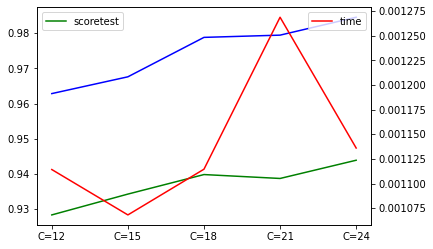

In [9]:
x=["C=12","C=15","C=18","C=21","C=24"]
scoretrain = plt.plot(x,accurancy_train, color = 'blue')
scoretest = plt.plot(x,accurancy_test, color = 'green')

plt.legend()
plt.legend(scoretest, ['scoretest'])

ax2 = plt.gca().twinx()
time = ax2.plot(x,accurancy_time, color = 'red')


plt.legend(time, ['time']) 
#reste a fix la legend



Nous choissions C=15 au vu de nos resultat en effet avec ce choix nous minimisons le temps et minimisons la variance (resilience de notre model)entre test et train. Néanmoins notre taux d'erreur reste important pour un developement a grande echelle sachant que aujoutdhui le taux de reconnaisance est proche de 100 pourcent. En effet la moyenne du score entre 15 et 24 est negligeable comparé au temps de calcul.

# 3. Cross-validation

#### MLP CLASSIFIER

Afin d’améliorer les performances en généralisation du réseau de neurones, on se propose de mettre en oeuvre un apprentissage avec arrêt précoce (early_stopping) par cross-validation.
Changer les paramètres du réseau pour séparer la base d’apprentissage précédente en deux sets : apprentissage (80%) et validation croisée (20% : validation _fraction=0.2).
Entraîner un réseau de neurones avec arrêt par cross-validation (fonction fit). Optimiser le nombre de neurones cachés C : répéter 10 fois l’apprentissage et calculer la moyenne et l’écart-type des taux en apprentissage et en validation afin de minimiser le biais et la variance (fonction score). Comparer avec les résultats obtenus précédemment. Conclure.
Conserver les poids du réseau optimal. Donner la matrice de confusion sur la base de test. Comparer les résultats obtenus avec ceux de l’algorithme des k-plus-proches-voisins en termes de
taux de reconnaissance et de temps de classification. Régler k sur une base de validation.

je décide d'aller de 3 en 3 pour les neuronnes car sinon c'est bcp trop long en temps de calcul

In [24]:
'''
import time
score_matrice_train=np.zeros((10,5))
score_matrice_test=np.zeros((10,5))
timefit_matrice=np.zeros((10,5))
time_matrice=np.zeros((10,5))
compte_columns=0
for hiden_layer in range(12,25,3):
    for compteur_ligne in range(10):
        model = MLPClassifier(hidden_layer_sizes=hiden_layer, validation_fraction=0.2,activation='tanh',solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=0,max_iter=100)
        #j'entraine mon model et calcul du temps
        start_time=time.time()
        model.fit(X_train,y_train)
        timefit=time.time() - start_time
        timefit_matrice[compteur_ligne][compte_columns]=timefit
        #time du predict
        start_time2=time.time()
        model.predict(X_test)
        timepredict=time.time() - start_time2
        time_matrice[compteur_ligne][compte_columns]=timepredict
        #je recupere les resultats pour le train
        score_matrice_train[compteur_ligne][compte_columns]=model.score(X_train,y_train)
        #je récupere les résultat pour la base de test
        score_matrice_test[compteur_ligne][compte_columns]=model.score(X_test,y_test)

    
    #je passe a la colonne suivante    
    compte_columns=compte_columns+1
'''

Iteration 1, loss = 1.72968197
Iteration 2, loss = 1.15222807
Iteration 3, loss = 0.90589267
Iteration 4, loss = 0.88844267
Iteration 5, loss = 0.67933264
Iteration 6, loss = 0.81334319
Iteration 7, loss = 0.93147162
Iteration 8, loss = 0.79741062
Iteration 9, loss = 0.68907592
Iteration 10, loss = 0.70029454
Iteration 11, loss = 0.64039893
Iteration 12, loss = 0.77396772
Iteration 13, loss = 0.68177141
Iteration 14, loss = 0.61224136
Iteration 15, loss = 0.59380505
Iteration 16, loss = 0.51309936
Iteration 17, loss = 0.68401502
Iteration 18, loss = 0.66998012
Iteration 19, loss = 0.62059855
Iteration 20, loss = 0.58739584
Iteration 21, loss = 0.70001118
Iteration 22, loss = 0.53078396
Iteration 23, loss = 0.56448197
Iteration 24, loss = 0.59902135
Iteration 25, loss = 0.54584939
Iteration 26, loss = 0.60702882
Iteration 27, loss = 0.56200295
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 28, loss = 0.45749682

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.62699449
Iteration 2, loss = 1.18151612
Iteration 3, loss = 0.96079905
Iteration 4, loss = 0.93072826
Iteration 5, loss = 0.92819904
Iteration 6, loss = 0.88741442
Iteration 7, loss = 0.71180122
Iteration 8, loss = 0.73530915
Iteration 9, loss = 0.62987344
Iteration 10, loss = 0.76529410
Iteration 11, loss = 0.65112547
Iteration 12, loss = 0.62296781
Iteration 13, loss = 0.53477312
Iteration 14, loss = 0.49277006
Iteration 15, loss = 0.62468412
Iteration 16, loss = 0.58411777
Iteration 17, loss = 0.48270498
Iteration 18, loss = 0.50175018
Iteration 19, loss = 0.53902243
Iteration 20, loss = 0.50822606
Iteration 21, loss = 0.48431733
Iteration 22, loss = 0.62345884
Iteration 23, loss = 0.44260344
Iteration 24, loss = 0.42512713
Iteration 25, loss = 0.44659620
Iteration 26, loss = 0.39376448
Iteration 27, loss = 0.41075357
Iteration 28, loss = 0.43109475
Iteration 29, loss = 0.32675744
Iteration 30, loss = 0.30637356
Iteration 31, loss = 0.33877882
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.66961627
Iteration 2, loss = 1.05851441
Iteration 3, loss = 0.91438328
Iteration 4, loss = 0.73359843
Iteration 5, loss = 0.66550455
Iteration 6, loss = 0.72177558
Iteration 7, loss = 0.52537351
Iteration 8, loss = 0.63037633
Iteration 9, loss = 0.62941831
Iteration 10, loss = 0.57537396
Iteration 11, loss = 0.62732901
Iteration 12, loss = 0.59590320
Iteration 13, loss = 0.51874794
Iteration 14, loss = 0.63034040
Iteration 15, loss = 0.53474989
Iteration 16, loss = 0.38763570
Iteration 17, loss = 0.39701823
Iteration 18, loss = 0.37717742
Iteration 19, loss = 0.46004100
Iteration 20, loss = 0.52949407
Iteration 21, loss = 0.64921372
Iteration 22, loss = 0.40658870
Iteration 23, loss = 0.38363770
Iteration 24, loss = 0.48260657
Iteration 25, loss = 0.45983415
Iteration 26, loss = 0.44159877
Iteration 27, loss = 0.40540296
Iteration 28, loss = 0.41718666
Iteration 29, loss = 0.40964748
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.04477058
Iteration 2, loss = 1.45244496
Iteration 3, loss = 1.18332768
Iteration 4, loss = 1.06039408
Iteration 5, loss = 0.82863049
Iteration 6, loss = 0.88146829
Iteration 7, loss = 0.83317473
Iteration 8, loss = 0.74035335
Iteration 9, loss = 0.72991003
Iteration 10, loss = 0.68399960
Iteration 11, loss = 0.67011995
Iteration 12, loss = 0.64232552
Iteration 13, loss = 0.72585486
Iteration 14, loss = 0.77388466
Iteration 15, loss = 0.70012981
Iteration 16, loss = 0.57761253
Iteration 17, loss = 0.67421853
Iteration 18, loss = 0.53603288
Iteration 19, loss = 0.53628498
Iteration 20, loss = 0.50236212
Iteration 21, loss = 0.50143001
Iteration 22, loss = 0.50430465
Iteration 23, loss = 0.39001887
Iteration 24, loss = 0.42174799
Iteration 25, loss = 0.36934523
Iteration 26, loss = 0.36091487
Iteration 27, loss = 0.40949750
Iteration 28, loss = 0.37536094
Iteration 29, loss = 0.47053159
Iteration 30, loss = 0.41147430
Iteration 31, loss = 0.37892093
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.56584919
Iteration 2, loss = 1.00796280
Iteration 3, loss = 0.96681658
Iteration 4, loss = 0.70483924
Iteration 5, loss = 0.56154899
Iteration 6, loss = 0.67825727
Iteration 7, loss = 0.65582866
Iteration 8, loss = 0.62758609
Iteration 9, loss = 0.55995705
Iteration 10, loss = 0.45517827
Iteration 11, loss = 0.46555390
Iteration 12, loss = 0.49949511
Iteration 13, loss = 0.51279384
Iteration 14, loss = 0.37461513
Iteration 15, loss = 0.40161344
Iteration 16, loss = 0.44652946
Iteration 17, loss = 0.40867325
Iteration 18, loss = 0.29299868
Iteration 19, loss = 0.42217405
Iteration 20, loss = 0.51853672
Iteration 21, loss = 0.42323229
Iteration 22, loss = 0.48865983
Iteration 23, loss = 0.37864475
Iteration 24, loss = 0.37465094
Iteration 25, loss = 0.36269422
Iteration 26, loss = 0.28770492
Iteration 27, loss = 0.37069372
Iteration 28, loss = 0.30519074
Iteration 29, loss = 0.30157866
Iteration 30, loss = 0.26945895
Iteration 31, loss = 0.34299179
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.90254703
Iteration 2, loss = 1.46266687
Iteration 3, loss = 1.27960563
Iteration 4, loss = 1.15748957
Iteration 5, loss = 1.02927100
Iteration 6, loss = 1.14180408
Iteration 7, loss = 0.98208227
Iteration 8, loss = 0.95107134
Iteration 9, loss = 0.88369101
Iteration 10, loss = 0.88016971
Iteration 11, loss = 0.84364768
Iteration 12, loss = 0.90072113
Iteration 13, loss = 0.99198216
Iteration 14, loss = 0.85425682
Iteration 15, loss = 0.84549238
Iteration 16, loss = 0.88806928
Iteration 17, loss = 0.79223441
Iteration 18, loss = 0.82690654
Iteration 19, loss = 0.95857029
Iteration 20, loss = 1.05043153
Iteration 21, loss = 0.85071668
Iteration 22, loss = 0.78903308
Iteration 23, loss = 0.75832561
Iteration 24, loss = 0.75187779
Iteration 25, loss = 0.79209864
Iteration 26, loss = 0.82700803
Iteration 27, loss = 0.83506791
Iteration 28, loss = 0.76942232
Iteration 29, loss = 0.72009065
Iteration 30, loss = 0.83936185
Iteration 31, loss = 0.74532616
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.79604983
Iteration 2, loss = 1.19355400
Iteration 3, loss = 0.80574006
Iteration 4, loss = 0.75803549
Iteration 5, loss = 0.66784501
Iteration 6, loss = 0.53560647
Iteration 7, loss = 0.66917590
Iteration 8, loss = 0.61078714
Iteration 9, loss = 0.53425820
Iteration 10, loss = 0.54952857
Iteration 11, loss = 0.42799668
Iteration 12, loss = 0.47112340
Iteration 13, loss = 0.46250551
Iteration 14, loss = 0.46292096
Iteration 15, loss = 0.38708344
Iteration 16, loss = 0.47685892
Iteration 17, loss = 0.45726568
Iteration 18, loss = 0.43985010
Iteration 19, loss = 0.36625466
Iteration 20, loss = 0.36762352
Iteration 21, loss = 0.36722854
Iteration 22, loss = 0.39895428
Iteration 23, loss = 0.39039855
Iteration 24, loss = 0.48259705
Iteration 25, loss = 0.41069632
Iteration 26, loss = 0.44068303
Iteration 27, loss = 0.35843269
Iteration 28, loss = 0.30724741
Iteration 29, loss = 0.33871727
Iteration 30, loss = 0.32617705
Iteration 31, loss = 0.33189281
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.68795150
Iteration 2, loss = 1.09237382
Iteration 3, loss = 0.97330914
Iteration 4, loss = 0.94694175
Iteration 5, loss = 0.75539324
Iteration 6, loss = 0.65671862
Iteration 7, loss = 0.62203726
Iteration 8, loss = 0.76498209
Iteration 9, loss = 0.78990224
Iteration 10, loss = 0.78637655
Iteration 11, loss = 0.71220015
Iteration 12, loss = 0.65383290
Iteration 13, loss = 0.60532498
Iteration 14, loss = 0.65221181
Iteration 15, loss = 0.55896222
Iteration 16, loss = 0.55062495
Iteration 17, loss = 0.49319956
Iteration 18, loss = 0.52676368
Iteration 19, loss = 0.42054311
Iteration 20, loss = 0.48608765
Iteration 21, loss = 0.47672830
Iteration 22, loss = 0.49992495
Iteration 23, loss = 0.55598929
Iteration 24, loss = 0.48738181
Iteration 25, loss = 0.48037534
Iteration 26, loss = 0.49381010
Iteration 27, loss = 0.47158611
Iteration 28, loss = 0.47714914
Iteration 29, loss = 0.41970795
Iteration 30, loss = 0.36374739
Iteration 31, loss = 0.41492346
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.80713514
Iteration 2, loss = 1.25920303
Iteration 3, loss = 1.10607382
Iteration 4, loss = 1.10385448
Iteration 5, loss = 1.07284402
Iteration 6, loss = 1.02766943
Iteration 7, loss = 0.95316981
Iteration 8, loss = 0.93130031
Iteration 9, loss = 0.80926311
Iteration 10, loss = 0.73622488
Iteration 11, loss = 0.78005058
Iteration 12, loss = 0.77554657
Iteration 13, loss = 0.62657881
Iteration 14, loss = 0.70115716
Iteration 15, loss = 0.61072533
Iteration 16, loss = 0.61712271
Iteration 17, loss = 0.55544963
Iteration 18, loss = 0.64679591
Iteration 19, loss = 0.58896936
Iteration 20, loss = 0.70078569
Iteration 21, loss = 0.55921066
Iteration 22, loss = 0.51951203
Iteration 23, loss = 0.57213353
Iteration 24, loss = 0.59186588
Iteration 25, loss = 0.41269756
Iteration 26, loss = 0.47310057
Iteration 27, loss = 0.42930796
Iteration 28, loss = 0.36805177
Iteration 29, loss = 0.47443538
Iteration 30, loss = 0.59165551
Iteration 31, loss = 0.39389564
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.02271437
Iteration 2, loss = 1.70830105
Iteration 3, loss = 1.48160075
Iteration 4, loss = 1.45013390
Iteration 5, loss = 1.30325777
Iteration 6, loss = 1.16609806
Iteration 7, loss = 1.09516226
Iteration 8, loss = 0.94179455
Iteration 9, loss = 0.96076167
Iteration 10, loss = 1.06113935
Iteration 11, loss = 0.87741398
Iteration 12, loss = 0.89802319
Iteration 13, loss = 0.92470564
Iteration 14, loss = 0.89548956
Iteration 15, loss = 0.85431294
Iteration 16, loss = 0.76617860
Iteration 17, loss = 0.76199188
Iteration 18, loss = 0.88677549
Iteration 19, loss = 0.75780343
Iteration 20, loss = 0.68573565
Iteration 21, loss = 0.65448503
Iteration 22, loss = 0.66001057
Iteration 23, loss = 0.76885365
Iteration 24, loss = 0.68012230
Iteration 25, loss = 0.64147565
Iteration 26, loss = 0.62935557
Iteration 27, loss = 0.68530103
Iteration 28, loss = 0.78311429
Iteration 29, loss = 0.66510236
Iteration 30, loss = 0.61716990
Iteration 31, loss = 0.78552835
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.68149230
Iteration 2, loss = 1.01961446
Iteration 3, loss = 0.88746183
Iteration 4, loss = 0.68260861
Iteration 5, loss = 0.64992917
Iteration 6, loss = 0.74839435
Iteration 7, loss = 0.61647198
Iteration 8, loss = 0.62202702
Iteration 9, loss = 0.50483692
Iteration 10, loss = 0.56648965
Iteration 11, loss = 0.48148988
Iteration 12, loss = 0.44329612
Iteration 13, loss = 0.56318854
Iteration 14, loss = 0.45807046
Iteration 15, loss = 0.42577462
Iteration 16, loss = 0.51501842
Iteration 17, loss = 0.47313559
Iteration 18, loss = 0.44775142
Iteration 19, loss = 0.46539488
Iteration 20, loss = 0.48459579
Iteration 21, loss = 0.46193548
Iteration 22, loss = 0.41680597
Iteration 23, loss = 0.35200958
Iteration 24, loss = 0.37360321
Iteration 25, loss = 0.37393720
Iteration 26, loss = 0.47222580
Iteration 27, loss = 0.37638798
Iteration 28, loss = 0.40855230
Iteration 29, loss = 0.46087209
Iteration 30, loss = 0.34796789
Iteration 31, loss = 0.45929894
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.59654519
Iteration 2, loss = 0.95003041
Iteration 3, loss = 0.67354218
Iteration 4, loss = 0.55547482
Iteration 5, loss = 0.56395421
Iteration 6, loss = 0.56334151
Iteration 7, loss = 0.56049426
Iteration 8, loss = 0.46019956
Iteration 9, loss = 0.38191134
Iteration 10, loss = 0.45857350
Iteration 11, loss = 0.41710214
Iteration 12, loss = 0.66244961
Iteration 13, loss = 0.64162963
Iteration 14, loss = 0.55711268
Iteration 15, loss = 0.45127739
Iteration 16, loss = 0.34111323
Iteration 17, loss = 0.36890269
Iteration 18, loss = 0.33252108
Iteration 19, loss = 0.27836720
Iteration 20, loss = 0.42142591
Iteration 21, loss = 0.34335575
Iteration 22, loss = 0.30882836
Iteration 23, loss = 0.31447036
Iteration 24, loss = 0.29283798
Iteration 25, loss = 0.29168196
Iteration 26, loss = 0.30538900
Iteration 27, loss = 0.22482227
Iteration 28, loss = 0.28641508
Iteration 29, loss = 0.26264937
Iteration 30, loss = 0.25596975
Iteration 31, loss = 0.28418000
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.78172031
Iteration 2, loss = 1.03984492
Iteration 3, loss = 0.73215049
Iteration 4, loss = 0.72965465
Iteration 5, loss = 0.67949058
Iteration 6, loss = 0.49117869
Iteration 7, loss = 0.54521825
Iteration 8, loss = 0.48260732
Iteration 9, loss = 0.50151811
Iteration 10, loss = 0.33035245
Iteration 11, loss = 0.36092872
Iteration 12, loss = 0.43122161
Iteration 13, loss = 0.44798630
Iteration 14, loss = 0.39410251
Iteration 15, loss = 0.43267983
Iteration 16, loss = 0.33538922
Iteration 17, loss = 0.24742675
Iteration 18, loss = 0.28495967
Iteration 19, loss = 0.32218306
Iteration 20, loss = 0.37116480
Iteration 21, loss = 0.39941815
Iteration 22, loss = 0.38542401
Iteration 23, loss = 0.34144460
Iteration 24, loss = 0.41152905
Iteration 25, loss = 0.27635013
Iteration 26, loss = 0.30348540
Iteration 27, loss = 0.32879112
Iteration 28, loss = 0.34498201
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.03230242
Iteration 2, loss = 1.47934691
Iteration 3, loss = 1.07685409
Iteration 4, loss = 0.93953912
Iteration 5, loss = 0.92524552
Iteration 6, loss = 0.74596117
Iteration 7, loss = 0.95300834
Iteration 8, loss = 0.98231427
Iteration 9, loss = 0.81223257
Iteration 10, loss = 0.59437749
Iteration 11, loss = 0.57054923
Iteration 12, loss = 0.68501837
Iteration 13, loss = 0.60771824
Iteration 14, loss = 0.58815060
Iteration 15, loss = 0.52553349
Iteration 16, loss = 0.65103759
Iteration 17, loss = 0.58468548
Iteration 18, loss = 0.49073211
Iteration 19, loss = 0.52905065
Iteration 20, loss = 0.51596848
Iteration 21, loss = 0.47328926
Iteration 22, loss = 0.41874396
Iteration 23, loss = 0.35282694
Iteration 24, loss = 0.43949763
Iteration 25, loss = 0.33407635
Iteration 26, loss = 0.38451336
Iteration 27, loss = 0.38027798
Iteration 28, loss = 0.28802505
Iteration 29, loss = 0.36659539
Iteration 30, loss = 0.33684566
Iteration 31, loss = 0.25705528
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.59107096
Iteration 2, loss = 0.94509397
Iteration 3, loss = 0.73779843
Iteration 4, loss = 0.74761856
Iteration 5, loss = 0.60848536
Iteration 6, loss = 0.58534431
Iteration 7, loss = 0.43301902
Iteration 8, loss = 0.54996230
Iteration 9, loss = 0.53821302
Iteration 10, loss = 0.48224390
Iteration 11, loss = 0.61426538
Iteration 12, loss = 0.47360105
Iteration 13, loss = 0.43917857
Iteration 14, loss = 0.46075411
Iteration 15, loss = 0.44099683
Iteration 16, loss = 0.42346211
Iteration 17, loss = 0.43806625
Iteration 18, loss = 0.46168983
Iteration 19, loss = 0.35597461
Iteration 20, loss = 0.29610666
Iteration 21, loss = 0.44345271
Iteration 22, loss = 0.50046810
Iteration 23, loss = 0.42670467
Iteration 24, loss = 0.37744634
Iteration 25, loss = 0.37487435
Iteration 26, loss = 0.38420138
Iteration 27, loss = 0.30326612
Iteration 28, loss = 0.31774784
Iteration 29, loss = 0.45468053
Iteration 30, loss = 0.37083369
Iteration 31, loss = 0.37211041
Training loss did

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.91343270
Iteration 2, loss = 1.39906317
Iteration 3, loss = 1.16847600
Iteration 4, loss = 1.24330856
Iteration 5, loss = 0.90250216
Iteration 6, loss = 0.80207705
Iteration 7, loss = 0.85714681
Iteration 8, loss = 0.85856949
Iteration 9, loss = 0.64121687
Iteration 10, loss = 0.64980633
Iteration 11, loss = 0.72926902
Iteration 12, loss = 0.60217692
Iteration 13, loss = 0.69729622
Iteration 14, loss = 0.62789944
Iteration 15, loss = 0.47503287
Iteration 16, loss = 0.47249419
Iteration 17, loss = 0.46759214
Iteration 18, loss = 0.42527203
Iteration 19, loss = 0.51915538
Iteration 20, loss = 0.45879947
Iteration 21, loss = 0.49120989
Iteration 22, loss = 0.56205093
Iteration 23, loss = 0.50110650
Iteration 24, loss = 0.49673593
Iteration 25, loss = 0.50559122
Iteration 26, loss = 0.39593213
Iteration 27, loss = 0.43902871
Iteration 28, loss = 0.39934044
Iteration 29, loss = 0.42109513
Iteration 30, loss = 0.53691778
Iteration 31, loss = 0.44996930
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.53341036
Iteration 2, loss = 0.86092532
Iteration 3, loss = 0.73967886
Iteration 4, loss = 0.56827371
Iteration 5, loss = 0.46337759
Iteration 6, loss = 0.41385913
Iteration 7, loss = 0.39253292
Iteration 8, loss = 0.41314685
Iteration 9, loss = 0.38848578
Iteration 10, loss = 0.28395527
Iteration 11, loss = 0.30553783
Iteration 12, loss = 0.33682913
Iteration 13, loss = 0.33313514
Iteration 14, loss = 0.52132917
Iteration 15, loss = 0.36196153
Iteration 16, loss = 0.40601379
Iteration 17, loss = 0.43834240
Iteration 18, loss = 0.45140651
Iteration 19, loss = 0.44393565
Iteration 20, loss = 0.36297898
Iteration 21, loss = 0.30531025
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 22, loss = 0.21942988
Iteration 23, loss = 0.17169430
Iteration 24, loss = 0.15844495
Iteration 25, loss = 0.14934921
Iteration 26, loss = 0.14503285
Iteration 27, loss = 0.13969758
Iteration 28, loss = 0.13045214

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.43758377
Iteration 2, loss = 0.86190800
Iteration 3, loss = 0.86412029
Iteration 4, loss = 0.68715999
Iteration 5, loss = 0.65410949
Iteration 6, loss = 0.57710453
Iteration 7, loss = 0.52874175
Iteration 8, loss = 0.53233451
Iteration 9, loss = 0.54247320
Iteration 10, loss = 0.49683303
Iteration 11, loss = 0.36095423
Iteration 12, loss = 0.36239464
Iteration 13, loss = 0.35791085
Iteration 14, loss = 0.42763101
Iteration 15, loss = 0.38711452
Iteration 16, loss = 0.29292647
Iteration 17, loss = 0.36708336
Iteration 18, loss = 0.32413012
Iteration 19, loss = 0.37490923
Iteration 20, loss = 0.40429722
Iteration 21, loss = 0.35811992
Iteration 22, loss = 0.35991455
Iteration 23, loss = 0.35135537
Iteration 24, loss = 0.28382292
Iteration 25, loss = 0.32250379
Iteration 26, loss = 0.28563814
Iteration 27, loss = 0.42379784
Iteration 28, loss = 0.26439515
Iteration 29, loss = 0.27601366
Iteration 30, loss = 0.25032546
Iteration 31, loss = 0.26428944
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.79127788
Iteration 2, loss = 1.32725467
Iteration 3, loss = 1.29285031
Iteration 4, loss = 1.21014961
Iteration 5, loss = 1.18474834
Iteration 6, loss = 1.02087637
Iteration 7, loss = 0.93677163
Iteration 8, loss = 0.75531461
Iteration 9, loss = 0.91595268
Iteration 10, loss = 0.74673369
Iteration 11, loss = 0.79544765
Iteration 12, loss = 0.70537919
Iteration 13, loss = 0.55086596
Iteration 14, loss = 0.54509706
Iteration 15, loss = 0.56411126
Iteration 16, loss = 0.46549412
Iteration 17, loss = 0.51617362
Iteration 18, loss = 0.50500011
Iteration 19, loss = 0.40920031
Iteration 20, loss = 0.49977906
Iteration 21, loss = 0.45612550
Iteration 22, loss = 0.49936906
Iteration 23, loss = 0.45175872
Iteration 24, loss = 0.46480299
Iteration 25, loss = 0.50193896
Iteration 26, loss = 0.40595171
Iteration 27, loss = 0.44633593
Iteration 28, loss = 0.38669975
Iteration 29, loss = 0.39721029
Iteration 30, loss = 0.47825386
Iteration 31, loss = 0.38559973
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.02666554
Iteration 2, loss = 1.44724062
Iteration 3, loss = 1.09984193
Iteration 4, loss = 0.86160832
Iteration 5, loss = 0.72551598
Iteration 6, loss = 0.67217084
Iteration 7, loss = 0.75447915
Iteration 8, loss = 0.80702370
Iteration 9, loss = 0.70910600
Iteration 10, loss = 0.61126139
Iteration 11, loss = 0.59930718
Iteration 12, loss = 0.57955050
Iteration 13, loss = 0.50172160
Iteration 14, loss = 0.52089293
Iteration 15, loss = 0.47904577
Iteration 16, loss = 0.57470247
Iteration 17, loss = 0.49157276
Iteration 18, loss = 0.48911080
Iteration 19, loss = 0.48527509
Iteration 20, loss = 0.42869663
Iteration 21, loss = 0.45975351
Iteration 22, loss = 0.42219201
Iteration 23, loss = 0.48151364
Iteration 24, loss = 0.55022318
Iteration 25, loss = 0.41654077
Iteration 26, loss = 0.39662129
Iteration 27, loss = 0.46198850
Iteration 28, loss = 0.46535142
Iteration 29, loss = 0.47827085
Iteration 30, loss = 0.34043144
Iteration 31, loss = 0.40798197
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.65201778
Iteration 2, loss = 0.86505522
Iteration 3, loss = 0.65353923
Iteration 4, loss = 0.55071128
Iteration 5, loss = 0.55339451
Iteration 6, loss = 0.63834970
Iteration 7, loss = 0.51766710
Iteration 8, loss = 0.48931747
Iteration 9, loss = 0.43977306
Iteration 10, loss = 0.41890808
Iteration 11, loss = 0.41729053
Iteration 12, loss = 0.43866526
Iteration 13, loss = 0.43072857
Iteration 14, loss = 0.40636876
Iteration 15, loss = 0.35282136
Iteration 16, loss = 0.41164026
Iteration 17, loss = 0.38397238
Iteration 18, loss = 0.33822766
Iteration 19, loss = 0.31496563
Iteration 20, loss = 0.27259196
Iteration 21, loss = 0.34987457
Iteration 22, loss = 0.26185582
Iteration 23, loss = 0.30860078
Iteration 24, loss = 0.26064950
Iteration 25, loss = 0.36802669
Iteration 26, loss = 0.46213581
Iteration 27, loss = 0.43787573
Iteration 28, loss = 0.35445565
Iteration 29, loss = 0.33418991
Iteration 30, loss = 0.36214330
Iteration 31, loss = 0.27558873
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.63484748
Iteration 2, loss = 1.06478707
Iteration 3, loss = 0.80435509
Iteration 4, loss = 0.71677024
Iteration 5, loss = 0.70682345
Iteration 6, loss = 0.55340745
Iteration 7, loss = 0.57519984
Iteration 8, loss = 0.44758463
Iteration 9, loss = 0.44674647
Iteration 10, loss = 0.44787258
Iteration 11, loss = 0.48599895
Iteration 12, loss = 0.46477942
Iteration 13, loss = 0.52637195
Iteration 14, loss = 0.61437288
Iteration 15, loss = 0.46799984
Iteration 16, loss = 0.54070769
Iteration 17, loss = 0.43158799
Iteration 18, loss = 0.44075141
Iteration 19, loss = 0.40737509
Iteration 20, loss = 0.34821759
Iteration 21, loss = 0.52314871
Iteration 22, loss = 0.48843160
Iteration 23, loss = 0.51261296
Iteration 24, loss = 0.46623122
Iteration 25, loss = 0.51090085
Iteration 26, loss = 0.34634952
Iteration 27, loss = 0.30362362
Iteration 28, loss = 0.24473741
Iteration 29, loss = 0.32728308
Iteration 30, loss = 0.35160522
Iteration 31, loss = 0.32621974
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.01631576
Iteration 2, loss = 1.57833681
Iteration 3, loss = 1.15511452
Iteration 4, loss = 1.19431140
Iteration 5, loss = 1.02330867
Iteration 6, loss = 0.90323579
Iteration 7, loss = 1.09156022
Iteration 8, loss = 0.85889335
Iteration 9, loss = 0.71582393
Iteration 10, loss = 0.57955283
Iteration 11, loss = 0.61085152
Iteration 12, loss = 0.64069611
Iteration 13, loss = 0.49332158
Iteration 14, loss = 0.54783814
Iteration 15, loss = 0.57678674
Iteration 16, loss = 0.50201320
Iteration 17, loss = 0.57527133
Iteration 18, loss = 0.50971561
Iteration 19, loss = 0.50683124
Iteration 20, loss = 0.42353855
Iteration 21, loss = 0.62635770
Iteration 22, loss = 0.52574410
Iteration 23, loss = 0.42710530
Iteration 24, loss = 0.53010585
Iteration 25, loss = 0.45048035
Iteration 26, loss = 0.37043098
Iteration 27, loss = 0.51149007
Iteration 28, loss = 0.39603267
Iteration 29, loss = 0.35810893
Iteration 30, loss = 0.40557013
Iteration 31, loss = 0.39322697
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.34893049
Iteration 2, loss = 0.77075640
Iteration 3, loss = 0.67629554
Iteration 4, loss = 0.47789969
Iteration 5, loss = 0.53759377
Iteration 6, loss = 0.41822426
Iteration 7, loss = 0.37353208
Iteration 8, loss = 0.45908317
Iteration 9, loss = 0.38189813
Iteration 10, loss = 0.40075243
Iteration 11, loss = 0.37348714
Iteration 12, loss = 0.28095010
Iteration 13, loss = 0.26604957
Iteration 14, loss = 0.43254029
Iteration 15, loss = 0.42213439
Iteration 16, loss = 0.33751853
Iteration 17, loss = 0.41697705
Iteration 18, loss = 0.38096064
Iteration 19, loss = 0.37238522
Iteration 20, loss = 0.27593152
Iteration 21, loss = 0.26653322
Iteration 22, loss = 0.33657382
Iteration 23, loss = 0.31584857
Iteration 24, loss = 0.34003015
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 25, loss = 0.26596923
Iteration 26, loss = 0.20889771
Iteration 27, loss = 0.20750522
Iteration 28, loss = 0.18623584

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.56434061
Iteration 2, loss = 0.94809424
Iteration 3, loss = 0.72927897
Iteration 4, loss = 0.59234607
Iteration 5, loss = 0.63462100
Iteration 6, loss = 0.66750475
Iteration 7, loss = 0.57040404
Iteration 8, loss = 0.57059715
Iteration 9, loss = 0.51410270
Iteration 10, loss = 0.60419635
Iteration 11, loss = 0.56029354
Iteration 12, loss = 0.55337289
Iteration 13, loss = 0.51569480
Iteration 14, loss = 0.49749022
Iteration 15, loss = 0.39037394
Iteration 16, loss = 0.50555898
Iteration 17, loss = 0.39885478
Iteration 18, loss = 0.50074899
Iteration 19, loss = 0.49726919
Iteration 20, loss = 0.31754477
Iteration 21, loss = 0.33038851
Iteration 22, loss = 0.29210882
Iteration 23, loss = 0.24875315
Iteration 24, loss = 0.33129243
Iteration 25, loss = 0.33170773
Iteration 26, loss = 0.28719440
Iteration 27, loss = 0.25779754
Iteration 28, loss = 0.25174404
Iteration 29, loss = 0.30109241
Iteration 30, loss = 0.25094624
Iteration 31, loss = 0.28900766
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.52025326
Iteration 2, loss = 0.91274306
Iteration 3, loss = 0.77236017
Iteration 4, loss = 0.67407496
Iteration 5, loss = 0.56152762
Iteration 6, loss = 0.42779421
Iteration 7, loss = 0.44287739
Iteration 8, loss = 0.48411773
Iteration 9, loss = 0.47717534
Iteration 10, loss = 0.43802093
Iteration 11, loss = 0.41589645
Iteration 12, loss = 0.29475343
Iteration 13, loss = 0.44169370
Iteration 14, loss = 0.35760742
Iteration 15, loss = 0.45858949
Iteration 16, loss = 0.33185076
Iteration 17, loss = 0.27705622
Iteration 18, loss = 0.29827122
Iteration 19, loss = 0.25563393
Iteration 20, loss = 0.30004322
Iteration 21, loss = 0.36032525
Iteration 22, loss = 0.26724608
Iteration 23, loss = 0.20714891
Iteration 24, loss = 0.23124700
Iteration 25, loss = 0.24835559
Iteration 26, loss = 0.32355168
Iteration 27, loss = 0.24268173
Iteration 28, loss = 0.20754880
Iteration 29, loss = 0.31896954
Iteration 30, loss = 0.23253737
Iteration 31, loss = 0.23966605
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.72555935
Iteration 2, loss = 1.04418838
Iteration 3, loss = 0.67616107
Iteration 4, loss = 0.69431485
Iteration 5, loss = 0.56525477
Iteration 6, loss = 0.74548470
Iteration 7, loss = 0.52757281
Iteration 8, loss = 0.51255794
Iteration 9, loss = 0.44138633
Iteration 10, loss = 0.54092162
Iteration 11, loss = 0.39715402
Iteration 12, loss = 0.45819434
Iteration 13, loss = 0.57727082
Iteration 14, loss = 0.42627471
Iteration 15, loss = 0.44672857
Iteration 16, loss = 0.49271898
Iteration 17, loss = 0.50327093
Iteration 18, loss = 0.50082367
Iteration 19, loss = 0.44922354
Iteration 20, loss = 0.43421030
Iteration 21, loss = 0.36982188
Iteration 22, loss = 0.52183779
Iteration 23, loss = 0.55842213
Iteration 24, loss = 0.50579348
Iteration 25, loss = 0.38671335
Iteration 26, loss = 0.36935585
Iteration 27, loss = 0.35203633
Iteration 28, loss = 0.30556375
Iteration 29, loss = 0.35145922
Iteration 30, loss = 0.33064253
Iteration 31, loss = 0.27800992
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.36906433
Iteration 2, loss = 0.82725015
Iteration 3, loss = 0.62516168
Iteration 4, loss = 0.63755077
Iteration 5, loss = 0.63104702
Iteration 6, loss = 0.47097708
Iteration 7, loss = 0.47460720
Iteration 8, loss = 0.38720105
Iteration 9, loss = 0.35184242
Iteration 10, loss = 0.42050394
Iteration 11, loss = 0.50541002
Iteration 12, loss = 0.44741694
Iteration 13, loss = 0.49140974
Iteration 14, loss = 0.37717281
Iteration 15, loss = 0.43524559
Iteration 16, loss = 0.35724694
Iteration 17, loss = 0.40237387
Iteration 18, loss = 0.38371317
Iteration 19, loss = 0.33096284
Iteration 20, loss = 0.35316045
Iteration 21, loss = 0.31215848
Iteration 22, loss = 0.28897882
Iteration 23, loss = 0.37566336
Iteration 24, loss = 0.35106170
Iteration 25, loss = 0.31355063
Iteration 26, loss = 0.38179175
Iteration 27, loss = 0.35430172
Iteration 28, loss = 0.39277971
Iteration 29, loss = 0.27520266
Iteration 30, loss = 0.27412482
Iteration 31, loss = 0.22892085
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.63167699
Iteration 2, loss = 0.99167055
Iteration 3, loss = 0.76474492
Iteration 4, loss = 0.72999518
Iteration 5, loss = 0.57387239
Iteration 6, loss = 0.57346567
Iteration 7, loss = 0.49934575
Iteration 8, loss = 0.39717967
Iteration 9, loss = 0.49411931
Iteration 10, loss = 0.51564130
Iteration 11, loss = 0.41369601
Iteration 12, loss = 0.35752941
Iteration 13, loss = 0.31286417
Iteration 14, loss = 0.41352815
Iteration 15, loss = 0.38425377
Iteration 16, loss = 0.47531702
Iteration 17, loss = 0.34421895
Iteration 18, loss = 0.34712004
Iteration 19, loss = 0.35059574
Iteration 20, loss = 0.32977923
Iteration 21, loss = 0.26778245
Iteration 22, loss = 0.23677821
Iteration 23, loss = 0.22099629
Iteration 24, loss = 0.32837670
Iteration 25, loss = 0.24211923
Iteration 26, loss = 0.33810157
Iteration 27, loss = 0.33404702
Iteration 28, loss = 0.29407568
Iteration 29, loss = 0.23119228
Iteration 30, loss = 0.31892690
Iteration 31, loss = 0.23799792
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.49043948
Iteration 2, loss = 0.76522604
Iteration 3, loss = 0.59358603
Iteration 4, loss = 0.51059861
Iteration 5, loss = 0.45638238
Iteration 6, loss = 0.37158630
Iteration 7, loss = 0.42713274
Iteration 8, loss = 0.36696989
Iteration 9, loss = 0.39987496
Iteration 10, loss = 0.35691395
Iteration 11, loss = 0.39942385
Iteration 12, loss = 0.35394435
Iteration 13, loss = 0.28567357
Iteration 14, loss = 0.25888286
Iteration 15, loss = 0.29461978
Iteration 16, loss = 0.26588835
Iteration 17, loss = 0.29344333
Iteration 18, loss = 0.29313747
Iteration 19, loss = 0.23886344
Iteration 20, loss = 0.23511008
Iteration 21, loss = 0.27567432
Iteration 22, loss = 0.24947601
Iteration 23, loss = 0.25635665
Iteration 24, loss = 0.27478871
Iteration 25, loss = 0.17873892
Iteration 26, loss = 0.20964897
Iteration 27, loss = 0.20602366
Iteration 28, loss = 0.16272296
Iteration 29, loss = 0.17997126
Iteration 30, loss = 0.24734634
Iteration 31, loss = 0.22117647
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.52320645
Iteration 2, loss = 0.81077535
Iteration 3, loss = 0.66198278
Iteration 4, loss = 0.56902493
Iteration 5, loss = 0.49692643
Iteration 6, loss = 0.37590096
Iteration 7, loss = 0.37778586
Iteration 8, loss = 0.37237382
Iteration 9, loss = 0.31836826
Iteration 10, loss = 0.45095018
Iteration 11, loss = 0.40167384
Iteration 12, loss = 0.35997235
Iteration 13, loss = 0.32934255
Iteration 14, loss = 0.31777670
Iteration 15, loss = 0.35619430
Iteration 16, loss = 0.39037991
Iteration 17, loss = 0.43958261
Iteration 18, loss = 0.41359377
Iteration 19, loss = 0.32847074
Iteration 20, loss = 0.33531864
Iteration 21, loss = 0.29176224
Iteration 22, loss = 0.34083522
Iteration 23, loss = 0.44861095
Iteration 24, loss = 0.32732237
Iteration 25, loss = 0.31316158
Iteration 26, loss = 0.30674757
Iteration 27, loss = 0.29283449
Iteration 28, loss = 0.28782275
Iteration 29, loss = 0.31708058
Iteration 30, loss = 0.34093833
Iteration 31, loss = 0.27578986
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.59715329
Iteration 2, loss = 0.86734024
Iteration 3, loss = 0.59155178
Iteration 4, loss = 0.54345455
Iteration 5, loss = 0.39445775
Iteration 6, loss = 0.37904903
Iteration 7, loss = 0.39609960
Iteration 8, loss = 0.34798304
Iteration 9, loss = 0.36089728
Iteration 10, loss = 0.33195656
Iteration 11, loss = 0.35501931
Iteration 12, loss = 0.30632841
Iteration 13, loss = 0.30869563
Iteration 14, loss = 0.28246911
Iteration 15, loss = 0.37510222
Iteration 16, loss = 0.31812002
Iteration 17, loss = 0.26097505
Iteration 18, loss = 0.29796305
Iteration 19, loss = 0.23476344
Iteration 20, loss = 0.19750467
Iteration 21, loss = 0.33068489
Iteration 22, loss = 0.27064711
Iteration 23, loss = 0.21001358
Iteration 24, loss = 0.22498603
Iteration 25, loss = 0.28120858
Iteration 26, loss = 0.43951476
Iteration 27, loss = 0.34185877
Iteration 28, loss = 0.34817522
Iteration 29, loss = 0.25295527
Iteration 30, loss = 0.26799784
Iteration 31, loss = 0.28096699
Training loss did

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.33016618
Iteration 2, loss = 0.69679037
Iteration 3, loss = 0.49633896
Iteration 4, loss = 0.41723940
Iteration 5, loss = 0.44235965
Iteration 6, loss = 0.45068754
Iteration 7, loss = 0.45627415
Iteration 8, loss = 0.40648306
Iteration 9, loss = 0.50087678
Iteration 10, loss = 0.50083498
Iteration 11, loss = 0.34137626
Iteration 12, loss = 0.47777164
Iteration 13, loss = 0.53860755
Iteration 14, loss = 0.43301352
Iteration 15, loss = 0.44107217
Iteration 16, loss = 0.41393777
Iteration 17, loss = 0.34235068
Iteration 18, loss = 0.29563223
Iteration 19, loss = 0.26825071
Iteration 20, loss = 0.27079293
Iteration 21, loss = 0.28426988
Iteration 22, loss = 0.30506790
Iteration 23, loss = 0.29738067
Iteration 24, loss = 0.28241791
Iteration 25, loss = 0.28584803
Iteration 26, loss = 0.26063346
Iteration 27, loss = 0.24713879
Iteration 28, loss = 0.22303500
Iteration 29, loss = 0.24570922
Iteration 30, loss = 0.27267692
Iteration 31, loss = 0.25450865
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.44905807
Iteration 2, loss = 0.73704021
Iteration 3, loss = 0.56800947
Iteration 4, loss = 0.45179824
Iteration 5, loss = 0.49385649
Iteration 6, loss = 0.46107486
Iteration 7, loss = 0.46647195
Iteration 8, loss = 0.37323307
Iteration 9, loss = 0.37767901
Iteration 10, loss = 0.38568702
Iteration 11, loss = 0.36926883
Iteration 12, loss = 0.37768987
Iteration 13, loss = 0.31853574
Iteration 14, loss = 0.45087554
Iteration 15, loss = 0.36653898
Iteration 16, loss = 0.37983864
Iteration 17, loss = 0.33293181
Iteration 18, loss = 0.42972338
Iteration 19, loss = 0.29509788
Iteration 20, loss = 0.23749900
Iteration 21, loss = 0.25376270
Iteration 22, loss = 0.26717644
Iteration 23, loss = 0.33669763
Iteration 24, loss = 0.34131967
Iteration 25, loss = 0.22047137
Iteration 26, loss = 0.18917088
Iteration 27, loss = 0.21419946
Iteration 28, loss = 0.17373872
Iteration 29, loss = 0.19561270
Iteration 30, loss = 0.22933894
Iteration 31, loss = 0.23806378
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.56497265
Iteration 2, loss = 0.81520179
Iteration 3, loss = 0.67788613
Iteration 4, loss = 0.53908039
Iteration 5, loss = 0.42686867
Iteration 6, loss = 0.47031600
Iteration 7, loss = 0.34587064
Iteration 8, loss = 0.44662441
Iteration 9, loss = 0.51280296
Iteration 10, loss = 0.42504957
Iteration 11, loss = 0.41592785
Iteration 12, loss = 0.46070530
Iteration 13, loss = 0.35852301
Iteration 14, loss = 0.34969991
Iteration 15, loss = 0.33846793
Iteration 16, loss = 0.35299387
Iteration 17, loss = 0.45343106
Iteration 18, loss = 0.40854283
Iteration 19, loss = 0.36176626
Iteration 20, loss = 0.31708347
Iteration 21, loss = 0.26555853
Iteration 22, loss = 0.34156885
Iteration 23, loss = 0.35798024
Iteration 24, loss = 0.26375466
Iteration 25, loss = 0.26964848
Iteration 26, loss = 0.23982813
Iteration 27, loss = 0.34403308
Iteration 28, loss = 0.27857364
Iteration 29, loss = 0.29218195
Iteration 30, loss = 0.28856075
Iteration 31, loss = 0.23022401
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.52093781
Iteration 2, loss = 0.92796452
Iteration 3, loss = 0.69068087
Iteration 4, loss = 0.60446597
Iteration 5, loss = 0.55516827
Iteration 6, loss = 0.56339456
Iteration 7, loss = 0.46139826
Iteration 8, loss = 0.37153787
Iteration 9, loss = 0.43898739
Iteration 10, loss = 0.51869318
Iteration 11, loss = 0.45211836
Iteration 12, loss = 0.39046423
Iteration 13, loss = 0.42539559
Iteration 14, loss = 0.39274875
Iteration 15, loss = 0.41455589
Iteration 16, loss = 0.41309152
Iteration 17, loss = 0.31255950
Iteration 18, loss = 0.34098576
Iteration 19, loss = 0.37404879
Iteration 20, loss = 0.31527417
Iteration 21, loss = 0.40541898
Iteration 22, loss = 0.41402395
Iteration 23, loss = 0.37032219
Iteration 24, loss = 0.36688946
Iteration 25, loss = 0.49343738
Iteration 26, loss = 0.32564195
Iteration 27, loss = 0.27473795
Iteration 28, loss = 0.30107421
Iteration 29, loss = 0.24029959
Iteration 30, loss = 0.19962507
Iteration 31, loss = 0.37241136
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.57126269
Iteration 2, loss = 0.95618842
Iteration 3, loss = 0.71315157
Iteration 4, loss = 0.69614446
Iteration 5, loss = 0.72151717
Iteration 6, loss = 0.71976699
Iteration 7, loss = 0.65515403
Iteration 8, loss = 0.65986729
Iteration 9, loss = 0.80370230
Iteration 10, loss = 0.66887536
Iteration 11, loss = 0.51385432
Iteration 12, loss = 0.49853560
Iteration 13, loss = 0.49877124
Iteration 14, loss = 0.54658332
Iteration 15, loss = 0.48672943
Iteration 16, loss = 0.43001766
Iteration 17, loss = 0.44859289
Iteration 18, loss = 0.42465784
Iteration 19, loss = 0.40057782
Iteration 20, loss = 0.46726290
Iteration 21, loss = 0.63662081
Iteration 22, loss = 0.63300857
Iteration 23, loss = 0.36213791
Iteration 24, loss = 0.46310295
Iteration 25, loss = 0.53338181
Iteration 26, loss = 0.55355712
Iteration 27, loss = 0.38249352
Iteration 28, loss = 0.31258308
Iteration 29, loss = 0.33456111
Iteration 30, loss = 0.30481095
Iteration 31, loss = 0.33268620
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.64452073
Iteration 2, loss = 0.94557288
Iteration 3, loss = 0.73960651
Iteration 4, loss = 0.72208922
Iteration 5, loss = 0.56453420
Iteration 6, loss = 0.53269947
Iteration 7, loss = 0.52871107
Iteration 8, loss = 0.59519024
Iteration 9, loss = 0.40418906
Iteration 10, loss = 0.46884538
Iteration 11, loss = 0.40882189
Iteration 12, loss = 0.37854546
Iteration 13, loss = 0.58731421
Iteration 14, loss = 0.50333452
Iteration 15, loss = 0.30358594
Iteration 16, loss = 0.30633081
Iteration 17, loss = 0.39614175
Iteration 18, loss = 0.34962529
Iteration 19, loss = 0.39213714
Iteration 20, loss = 0.53211819
Iteration 21, loss = 0.53133663
Iteration 22, loss = 0.38273301
Iteration 23, loss = 0.30921951
Iteration 24, loss = 0.33313838
Iteration 25, loss = 0.39816748
Iteration 26, loss = 0.33097009
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 27, loss = 0.28898523
Iteration 28, loss = 0.25132024

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.57631215
Iteration 2, loss = 0.92553756
Iteration 3, loss = 0.78675499
Iteration 4, loss = 0.84464323
Iteration 5, loss = 0.72162120
Iteration 6, loss = 0.63560612
Iteration 7, loss = 0.63149272
Iteration 8, loss = 0.49511415
Iteration 9, loss = 0.39961590
Iteration 10, loss = 0.45114968
Iteration 11, loss = 0.43107630
Iteration 12, loss = 0.52772683
Iteration 13, loss = 0.44189518
Iteration 14, loss = 0.35334002
Iteration 15, loss = 0.34282945
Iteration 16, loss = 0.43071757
Iteration 17, loss = 0.39162304
Iteration 18, loss = 0.34582021
Iteration 19, loss = 0.27250920
Iteration 20, loss = 0.30059754
Iteration 21, loss = 0.34470608
Iteration 22, loss = 0.27149275
Iteration 23, loss = 0.29662445
Iteration 24, loss = 0.32406734
Iteration 25, loss = 0.31226904
Iteration 26, loss = 0.32277142
Iteration 27, loss = 0.29422295
Iteration 28, loss = 0.27932276
Iteration 29, loss = 0.26388367
Iteration 30, loss = 0.31672632
Iteration 31, loss = 0.25103167
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.37109069
Iteration 2, loss = 0.77643928
Iteration 3, loss = 0.60040125
Iteration 4, loss = 0.50382548
Iteration 5, loss = 0.56953958
Iteration 6, loss = 0.39960900
Iteration 7, loss = 0.47667303
Iteration 8, loss = 0.40915015
Iteration 9, loss = 0.42459999
Iteration 10, loss = 0.42005693
Iteration 11, loss = 0.37685261
Iteration 12, loss = 0.41116318
Iteration 13, loss = 0.40268276
Iteration 14, loss = 0.42612283
Iteration 15, loss = 0.44552559
Iteration 16, loss = 0.40194966
Iteration 17, loss = 0.27513891
Iteration 18, loss = 0.29584408
Iteration 19, loss = 0.33906294
Iteration 20, loss = 0.36364700
Iteration 21, loss = 0.34394672
Iteration 22, loss = 0.27283245
Iteration 23, loss = 0.24136761
Iteration 24, loss = 0.23939375
Iteration 25, loss = 0.26177976
Iteration 26, loss = 0.30797866
Iteration 27, loss = 0.27339539
Iteration 28, loss = 0.34722452
Iteration 29, loss = 0.30016055
Iteration 30, loss = 0.22483710
Iteration 31, loss = 0.31450604
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.50159789
Iteration 2, loss = 0.83876277
Iteration 3, loss = 0.72895329
Iteration 4, loss = 0.50830384
Iteration 5, loss = 0.56245352
Iteration 6, loss = 0.42586528
Iteration 7, loss = 0.41772400
Iteration 8, loss = 0.46047019
Iteration 9, loss = 0.35601454
Iteration 10, loss = 0.31551115
Iteration 11, loss = 0.32185600
Iteration 12, loss = 0.36458543
Iteration 13, loss = 0.41754758
Iteration 14, loss = 0.30722667
Iteration 15, loss = 0.33365456
Iteration 16, loss = 0.40827570
Iteration 17, loss = 0.37337625
Iteration 18, loss = 0.30654627
Iteration 19, loss = 0.26014493
Iteration 20, loss = 0.29226126
Iteration 21, loss = 0.26833758
Iteration 22, loss = 0.28452003
Iteration 23, loss = 0.26916421
Iteration 24, loss = 0.36313005
Iteration 25, loss = 0.43357031
Iteration 26, loss = 0.35496482
Iteration 27, loss = 0.31714353
Iteration 28, loss = 0.19438037
Iteration 29, loss = 0.41344966
Iteration 30, loss = 0.32078267
Iteration 31, loss = 0.28057044
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.32007333
Iteration 2, loss = 0.70943535
Iteration 3, loss = 0.57987638
Iteration 4, loss = 0.49752611
Iteration 5, loss = 0.37991117
Iteration 6, loss = 0.47734070
Iteration 7, loss = 0.46608802
Iteration 8, loss = 0.40150095
Iteration 9, loss = 0.35616788
Iteration 10, loss = 0.32970689
Iteration 11, loss = 0.36546828
Iteration 12, loss = 0.34652813
Iteration 13, loss = 0.28832215
Iteration 14, loss = 0.34330485
Iteration 15, loss = 0.33542296
Iteration 16, loss = 0.33405708
Iteration 17, loss = 0.37064937
Iteration 18, loss = 0.26134739
Iteration 19, loss = 0.25232544
Iteration 20, loss = 0.19897936
Iteration 21, loss = 0.22165584
Iteration 22, loss = 0.31650489
Iteration 23, loss = 0.26790321
Iteration 24, loss = 0.29131144
Iteration 25, loss = 0.27840832
Iteration 26, loss = 0.29610405
Iteration 27, loss = 0.25018349
Iteration 28, loss = 0.25499068
Iteration 29, loss = 0.26627069
Iteration 30, loss = 0.23397907
Iteration 31, loss = 0.22169344
Training loss did

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.39047706
Iteration 2, loss = 0.77314886
Iteration 3, loss = 0.52609806
Iteration 4, loss = 0.42227803
Iteration 5, loss = 0.38274924
Iteration 6, loss = 0.42462820
Iteration 7, loss = 0.42011264
Iteration 8, loss = 0.28931181
Iteration 9, loss = 0.34163842
Iteration 10, loss = 0.34894013
Iteration 11, loss = 0.33287019
Iteration 12, loss = 0.25979735
Iteration 13, loss = 0.32010180
Iteration 14, loss = 0.28574972
Iteration 15, loss = 0.24882094
Iteration 16, loss = 0.25888815
Iteration 17, loss = 0.26350423
Iteration 18, loss = 0.30327500
Iteration 19, loss = 0.28388351
Iteration 20, loss = 0.28244820
Iteration 21, loss = 0.27741303
Iteration 22, loss = 0.25992323
Iteration 23, loss = 0.26244151
Iteration 24, loss = 0.22961590
Iteration 25, loss = 0.21785294
Iteration 26, loss = 0.31060993
Iteration 27, loss = 0.27110569
Iteration 28, loss = 0.29798031
Iteration 29, loss = 0.17217631
Iteration 30, loss = 0.21224199
Iteration 31, loss = 0.21137007
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.37813680
Iteration 2, loss = 0.70637947
Iteration 3, loss = 0.59924852
Iteration 4, loss = 0.41118380
Iteration 5, loss = 0.55535756
Iteration 6, loss = 0.49415333
Iteration 7, loss = 0.41303532
Iteration 8, loss = 0.35485102
Iteration 9, loss = 0.32056615
Iteration 10, loss = 0.26630021
Iteration 11, loss = 0.27340326
Iteration 12, loss = 0.30263834
Iteration 13, loss = 0.21357101
Iteration 14, loss = 0.19098362
Iteration 15, loss = 0.30973375
Iteration 16, loss = 0.29208119
Iteration 17, loss = 0.29907932
Iteration 18, loss = 0.30991959
Iteration 19, loss = 0.18140119
Iteration 20, loss = 0.20929592
Iteration 21, loss = 0.18621632
Iteration 22, loss = 0.21203079
Iteration 23, loss = 0.16529175
Iteration 24, loss = 0.21191841
Iteration 25, loss = 0.37428988
Iteration 26, loss = 0.32037706
Iteration 27, loss = 0.21462060
Iteration 28, loss = 0.37033293
Iteration 29, loss = 0.41752333
Iteration 30, loss = 0.27484924
Iteration 31, loss = 0.35422056
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.33516602
Iteration 2, loss = 0.74404201
Iteration 3, loss = 0.61892025
Iteration 4, loss = 0.50074860
Iteration 5, loss = 0.53608930
Iteration 6, loss = 0.39799727
Iteration 7, loss = 0.39711269
Iteration 8, loss = 0.33248705
Iteration 9, loss = 0.32211581
Iteration 10, loss = 0.32211067
Iteration 11, loss = 0.39409017
Iteration 12, loss = 0.28465033
Iteration 13, loss = 0.25673647
Iteration 14, loss = 0.27173306
Iteration 15, loss = 0.25285409
Iteration 16, loss = 0.30243502
Iteration 17, loss = 0.27265970
Iteration 18, loss = 0.32524923
Iteration 19, loss = 0.23512822
Iteration 20, loss = 0.22437978
Iteration 21, loss = 0.18154755
Iteration 22, loss = 0.22207043
Iteration 23, loss = 0.25278881
Iteration 24, loss = 0.21416457
Iteration 25, loss = 0.24333888
Iteration 26, loss = 0.20554969
Iteration 27, loss = 0.19696417
Iteration 28, loss = 0.23242203
Iteration 29, loss = 0.17951273
Iteration 30, loss = 0.22553750
Iteration 31, loss = 0.26246138
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.31334354
Iteration 2, loss = 0.65897086
Iteration 3, loss = 0.52287019
Iteration 4, loss = 0.46605611
Iteration 5, loss = 0.42601349
Iteration 6, loss = 0.40894751
Iteration 7, loss = 0.40482406
Iteration 8, loss = 0.39167640
Iteration 9, loss = 0.36220541
Iteration 10, loss = 0.38000666
Iteration 11, loss = 0.44104445
Iteration 12, loss = 0.41307970
Iteration 13, loss = 0.35130745
Iteration 14, loss = 0.35979367
Iteration 15, loss = 0.25509942
Iteration 16, loss = 0.26178865
Iteration 17, loss = 0.26397857
Iteration 18, loss = 0.37443501
Iteration 19, loss = 0.43787732
Iteration 20, loss = 0.42159018
Iteration 21, loss = 0.32238759
Iteration 22, loss = 0.37752730
Iteration 23, loss = 0.25040347
Iteration 24, loss = 0.23464884
Iteration 25, loss = 0.18156910
Iteration 26, loss = 0.20090486
Iteration 27, loss = 0.21812950
Iteration 28, loss = 0.28736966
Iteration 29, loss = 0.22520818
Iteration 30, loss = 0.20543152
Iteration 31, loss = 0.20634777
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.53933697
Iteration 2, loss = 0.66615130
Iteration 3, loss = 0.53330404
Iteration 4, loss = 0.47817265
Iteration 5, loss = 0.49765557
Iteration 6, loss = 0.45903649
Iteration 7, loss = 0.42389920
Iteration 8, loss = 0.32741828
Iteration 9, loss = 0.34025394
Iteration 10, loss = 0.37217766
Iteration 11, loss = 0.32545418
Iteration 12, loss = 0.33477618
Iteration 13, loss = 0.33373213
Iteration 14, loss = 0.29614444
Iteration 15, loss = 0.33131469
Iteration 16, loss = 0.39522769
Iteration 17, loss = 0.29569781
Iteration 18, loss = 0.34500780
Iteration 19, loss = 0.36186934
Iteration 20, loss = 0.25971974
Iteration 21, loss = 0.27275327
Iteration 22, loss = 0.31738951
Iteration 23, loss = 0.28900553
Iteration 24, loss = 0.25958143
Iteration 25, loss = 0.21447792
Iteration 26, loss = 0.27094859
Iteration 27, loss = 0.33943630
Iteration 28, loss = 0.23038180
Iteration 29, loss = 0.24756026
Iteration 30, loss = 0.18139222
Iteration 31, loss = 0.22844838
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.25549641
Iteration 2, loss = 0.63618893
Iteration 3, loss = 0.48332592
Iteration 4, loss = 0.60289630
Iteration 5, loss = 0.53882897
Iteration 6, loss = 0.42321914
Iteration 7, loss = 0.39335811
Iteration 8, loss = 0.36564628
Iteration 9, loss = 0.39412702
Iteration 10, loss = 0.39555713
Iteration 11, loss = 0.36582648
Iteration 12, loss = 0.30448946
Iteration 13, loss = 0.29878311
Iteration 14, loss = 0.22867585
Iteration 15, loss = 0.30316003
Iteration 16, loss = 0.21767492
Iteration 17, loss = 0.24352148
Iteration 18, loss = 0.28542929
Iteration 19, loss = 0.24764638
Iteration 20, loss = 0.27968686
Iteration 21, loss = 0.29997848
Iteration 22, loss = 0.24884859
Iteration 23, loss = 0.24273625
Iteration 24, loss = 0.41205178
Iteration 25, loss = 0.31097624
Iteration 26, loss = 0.31077700
Iteration 27, loss = 0.27213712
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 28, loss = 0.24171884

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19834746
Iteration 2, loss = 0.68106429
Iteration 3, loss = 0.58701986
Iteration 4, loss = 0.50471141
Iteration 5, loss = 0.50341496
Iteration 6, loss = 0.43528115
Iteration 7, loss = 0.45795064
Iteration 8, loss = 0.34930374
Iteration 9, loss = 0.36003115
Iteration 10, loss = 0.38044348
Iteration 11, loss = 0.49917153
Iteration 12, loss = 0.45584026
Iteration 13, loss = 0.46526732
Iteration 14, loss = 0.36382535
Iteration 15, loss = 0.43268472
Iteration 16, loss = 0.39996145
Iteration 17, loss = 0.35120335
Iteration 18, loss = 0.28669984
Iteration 19, loss = 0.38352689
Iteration 20, loss = 0.30634252
Iteration 21, loss = 0.37963051
Iteration 22, loss = 0.37169978
Iteration 23, loss = 0.38688424
Iteration 24, loss = 0.36675905
Iteration 25, loss = 0.25791862
Iteration 26, loss = 0.40406871
Iteration 27, loss = 0.27749972
Iteration 28, loss = 0.30500667
Iteration 29, loss = 0.31371591
Iteration 30, loss = 0.36494514
Iteration 31, loss = 0.29646150
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.42118161
Iteration 2, loss = 0.74092434
Iteration 3, loss = 0.68018583
Iteration 4, loss = 0.56587992
Iteration 5, loss = 0.51423106
Iteration 6, loss = 0.44308703
Iteration 7, loss = 0.38847801
Iteration 8, loss = 0.32964022
Iteration 9, loss = 0.33827000
Iteration 10, loss = 0.38131920
Iteration 11, loss = 0.31775423
Iteration 12, loss = 0.29835585
Iteration 13, loss = 0.26095957
Iteration 14, loss = 0.29761600
Iteration 15, loss = 0.24536701
Iteration 16, loss = 0.27951990
Iteration 17, loss = 0.33505319
Iteration 18, loss = 0.36027361
Iteration 19, loss = 0.26467533
Iteration 20, loss = 0.24219469
Iteration 21, loss = 0.21226497
Iteration 22, loss = 0.26730207
Iteration 23, loss = 0.29443206
Iteration 24, loss = 0.19744444
Iteration 25, loss = 0.20292588
Iteration 26, loss = 0.28872497
Iteration 27, loss = 0.30586397
Iteration 28, loss = 0.25091484
Iteration 29, loss = 0.31837924
Iteration 30, loss = 0.28106212
Iteration 31, loss = 0.31960140
Iteration 32, los

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Sauvegarde des données

In [1]:
'''
#Sauvegarde des tableau de numpy en df pour eviter de les refaires a chauqe fois. random state = 42 on aura toujours les même resultats
df_score_matrice_train_partCV= pd.DataFrame(data=score_matrice_train,columns=['C=12','C=15','C=18','C=21','C=24'])
df_score_matrice_test_partCV = pd.DataFrame(data=score_matrice_test,columns=['C=12','C=15','C=18','C=21','C=24'])
df_timefit_matrice_partCV = pd.DataFrame(data=timefit_matrice,columns=['C=12','C=15','C=18','C=21','C=24'])
df_time_matrice_partCV = pd.DataFrame(data=time_matrice,columns=['C=12','C=15','C=18','C=21','C=24'])
#Export en PDF pour save en local et eviter le recalcul
df_score_matrice_train_partCV.to_excel("df_score_matrice_train_partCV.xlsx") 
df_score_matrice_test_partCV.to_excel("df_score_matrice_test_partCV.xlsx") 
df_timefit_matrice_partCV.to_excel("df_timefit_matrice_partCV.xlsx") 
df_time_matrice_partCV.to_excel("df_time_matrice_partCV.xlsx") 
'''

'\n#Sauvegarde des tableau de numpy en df pour eviter de les refaires a chauqe fois. random state = 42 on aura toujours les même resultats\ndf_score_matrice_train_partCV= pd.DataFrame(data=score_matrice_train,columns=[\'C=12\',\'C=15\',\'C=18\',\'C=21\',\'C=24\'])\ndf_score_matrice_test_partCV = pd.DataFrame(data=score_matrice_test,columns=[\'C=12\',\'C=15\',\'C=18\',\'C=21\',\'C=24\'])\ndf_timefit_matrice_partCV = pd.DataFrame(data=timefit_matrice,columns=[\'C=12\',\'C=15\',\'C=18\',\'C=21\',\'C=24\'])\ndf_time_matrice_partCV = pd.DataFrame(data=time_matrice,columns=[\'C=12\',\'C=15\',\'C=18\',\'C=21\',\'C=24\'])\n#Export en PDF pour save en local et eviter le recalcul\ndf_score_matrice_train_partCV.to_excel("df_score_matrice_train_partCV.xlsx") \ndf_score_matrice_test_partCV.to_excel("df_score_matrice_test_partCV.xlsx") \ndf_timefit_matrice_partCV.to_excel("df_timefit_matrice_partCV.xlsx") \ndf_time_matrice_partCV.to_excel("df_time_matrice_partCV.xlsx") \n'

In [10]:
score_matrice_train=[]
score_matrice_test=[]
timefit_matrice=[]
time_matrice=[]
#recuperation des données
score_matrice_train=pd.read_excel('df_score_matrice_train_partCV.xlsx', index_col=0)  
score_matrice_test=pd.read_excel('df_score_matrice_test_partCV.xlsx', index_col=0)  
timefit_matrice=pd.read_excel('df_timefit_matrice_partCV.xlsx', index_col=0) 
time_matrice=pd.read_excel('df_time_matrice_partCV.xlsx', index_col=0) 
#transformation en np
score_matrice_train=np.array(score_matrice_train)
score_matrice_test=np.array(score_matrice_test)
timefit_matrice=np.array(timefit_matrice)
time_matrice=np.array(time_matrice)
#calcule de la moyenne du score pour chaque colonne
accurancy_train=[]
accurancy_test=[]
accurancyfit_time=[]
accurancy_time=[]
for i in range(5):
    accurancy_train.append(score_matrice_train[:,i].mean())
    accurancy_test.append(score_matrice_test[:,i].mean())
    accurancyfit_time.append(timefit_matrice[:,i].mean())
    accurancy_time.append(time_matrice[:,i].mean())

No handles with labels found to put in legend.


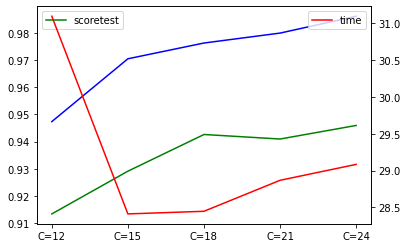

In [13]:
x=["C=12","C=15","C=18","C=21","C=24"]
scoretrain = plt.plot(x,accurancy_train, color = 'blue')
scoretest = plt.plot(x,accurancy_test, color = 'green')

plt.legend()
plt.legend(scoretest, ['scoretest'])

ax2 = plt.gca().twinx()
time = ax2.plot(x,accurancyfit_time, color = 'red')

plt.legend(time, ['time']) 
#reste a fix la legend


Optimal C=18
minimise le rapport temps score


In [9]:
import time
#Il faut relancer le prog avec le C optimal nous avons ici choisi 18
start_time = time.time()
model1= MLPClassifier(hidden_layer_sizes=18, activation='tanh',solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=0,max_iter=400)
model1.fit(X_train,y_train)
parameter= model1.get_params(deep=True) #return un dictionaire
timeCoptimal=time.time() - start_time



In [10]:
print(f"le score en train est de : {model1.score(X_train,y_train)}")
print(f"le score en test est de : {model1.score(X_test,y_test)}")

le score en train est de : 0.9817024661893397
le score en test est de : 0.9537037037037037


In [11]:
y_pred_test=model1.predict(X_test)
y_pred_train=model1.predict(X_train)

In [12]:
metrics.confusion_matrix(y_test,y_pred_test)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 59,  0,  1,  0,  0,  0],
       [ 0,  3,  0,  0,  0, 60,  1,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 41,  0],
       [ 0,  0,  1,  1,  0,  1,  0,  0,  4, 52]])

In [13]:
compteur=0
erreurarraytrain=[]
for i in range(10):
    erreur=0
    for compteur in range(10):
        if (compteur != i):
            erreur=erreur + metrics.confusion_matrix(y_train,y_pred_train)[compteur][i]
            compteur=compteur+1
        else: 
            compteur=compteur+1
    erreurarraytrain.append(erreur)
    compteur=0

erreurarraytrain

[0, 5, 0, 0, 3, 2, 0, 2, 6, 5]

Dans cette matrice de confusions nous pouvons remarquer que le plus grand nombre d'erreur se trouve pour les valeur 1 et 8 de plus nous pouvons observer que le 1 est régulierement confondu avec un 5(3fois)et le 8 avec un neuf (4 fois)

In [14]:
metrics.confusion_matrix(y_train,y_pred_train)

array([[125,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 129,   0,   0,   2,   0,   0,   0,   0,   1],
       [  0,   0, 128,   0,   0,   0,   0,   0,   2,   0],
       [  0,   0,   0, 125,   0,   0,   0,   0,   3,   1],
       [  0,   0,   0,   0, 121,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 114,   0,   0,   0,   2],
       [  0,   0,   0,   0,   0,   0, 128,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 123,   0,   0],
       [  0,   5,   0,   0,   0,   0,   0,   1, 124,   1],
       [  0,   0,   0,   0,   0,   2,   0,   1,   1, 117]])

In [15]:
compteur=0
erreurarraytest=[]
for i in range(10):
    erreur=0
    for compteur in range(10):
        if (compteur != i):
            erreur=erreur + metrics.confusion_matrix(y_test,y_pred_test)[compteur][i]
            compteur=compteur+1
        else: 
            compteur=compteur+1
    erreurarraytest.append(erreur)
    compteur=0

In [16]:
erreurarraytest

[1, 4, 3, 3, 0, 2, 2, 1, 7, 2]

Dans cette matrice de confusions nous pouvons remarquer que le plus grand nombre d'erreur se trouve pour les valeur 1 et 8 tjrs de plus nous pouvons observer que le 1 est régulierement confondu avec un 9(5fois)et le 8 avec un trois (3 fois)

recuperer parameter as un dictionaire

In [ ]:
'''
with open('parameter.json') as parameter:
    parameterdl = json.load(parameter)
#charge le model avec les poids du dictionaire
clf8 = MLPClassifier(hidden_layer_sizes=hiden_layer, activation=’tanh’, solver=’sgd’, batch_size=1, alpha=0, learning_rate=’adaptive’,max_iter=100, validation _fraction=0.2,verbose=1)
clf8.set_params(parameterdl)
clf9=clf8.fit(X_train,y_train)
'''

#### KNN

In [143]:
X.shape

(1797, 64)

Notre K va varier de 0 a 1797/10 soit Kmax=180 apres on sera en surentrainement 

In [34]:
'''
import time
score_matriceKNN_train=np.zeros((10,181))
score_matriceKNN_test=np.zeros((10,181))
timeKNNfit_matrice=np.zeros((10,181))
timeKNN_matrice=np.zeros((10,181))
compte_columns=0
for k in range(1,181):
    for i in range(10):
        model=KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        #calcul du temps
        start_time=time.time()
        model.fit(X_train,y_train)
        timefit=time.time() - start_time
        
        start_time2=time.time()
        model.predict(X_test)
        timepredict=time.time() - start_time2
        
        score_matriceKNN_train[i][compte_columns]=model.score(X_train,y_train)
        score_matriceKNN_test[i][compte_columns]=model.score(X_test,y_test)
        timeKNNfit_matrice[i][k]=timefit
        timeKNN_matrice[i][k]=timepredict

    #je passe a la colonne suivante    
    compte_columns=compte_columns+1
'''

In [35]:
'''
#Sauvegarde des tableau de numpy en df pour eviter de les refaires a chauqe fois. random state = 42 on aura toujours les même resultats
df_score_matrice_train_partKNN= pd.DataFrame(data=score_matriceKNN_train)
df_score_matrice_test_partKNN = pd.DataFrame(data=score_matriceKNN_test)
df_timefit_matrice_partKNN = pd.DataFrame(data=timeKNNfit_matrice)
df_time_matrice_partKNN = pd.DataFrame(data=timeKNN_matrice)
#Export en PDF pour save en local et eviter le recalcul
df_score_matrice_train_partKNN.to_excel("df_score_matrice_train_partKNN.xlsx") 
df_score_matrice_test_partKNN.to_excel("df_score_matrice_test_partKNN.xlsx") 
df_timefit_matrice_partKNN.to_excel("df_timefit_matrice_partKNN.xlsx") 
df_time_matrice_partKNN.to_excel("df_time_matrice_partKNN.xlsx") 
'''

In [17]:
score_matrice_train=[]
score_matrice_test=[]
time_matrice=[]
timefit_matrice=[]
#recuperation des données
score_matrice_train=pd.read_excel('df_score_matrice_train_partKNN.xlsx', index_col=0)  
score_matrice_test=pd.read_excel('df_score_matrice_test_partKNN.xlsx', index_col=0)  
time_matrice=pd.read_excel('df_time_matrice_partKNN.xlsx', index_col=0) 
timefit_matrice=pd.read_excel('df_timefit_matrice_partKNN.xlsx', index_col=0) 
#transformation en np

score_matrice_train=np.array(score_matrice_train)
score_matrice_test=np.array(score_matrice_test)
time_matrice=np.array(time_matrice)
timefit_matrice=np.array(timefit_matrice)
#calcule de la moyenne du score pour chaque colonne
accurancy_train=[]
accurancy_test=[]
accurancy_time=[]
accurancyfit_time=[]
for i in range(180):
    accurancy_train.append(score_matrice_train[:,i].mean())
    accurancy_test.append(score_matrice_test[:,i].mean())
    accurancy_time.append(time_matrice[:,i].mean())
    accurancyfit_time.append(timefit_matrice[:,i].mean())

No handles with labels found to put in legend.


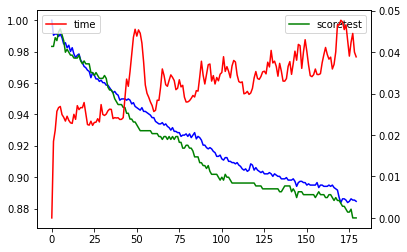

In [18]:
x=[]
for i in range(180):
    x.append(i)
    
    
scoretrain = plt.plot(x,accurancy_train, color = 'blue')
scoretest = plt.plot(x,accurancy_test, color = 'green')

plt.legend()
plt.legend(scoretest, ['scoretest'])

ax2 = plt.gca().twinx()
time = ax2.plot(x,accurancy_time, color = 'red')

plt.legend(time, ['time']) 
#reste a fix la legend



Notre K optimal se situe au environ  de 15 en effet plus le K augmente plus le temps de calcul augmente et la precissions baisse en test et en train. Notre model a trop de voisin et donc de distance ou il se trompe

## 4. Rejet

On se propose d’améliorer les performances précédentes en autorisant le rejet dans l’étape de décision. On étudiera successivement :
- le rejet de distance : argmax_reject_threshold
- le rejet d’ambigüité : argmax_top2_reject_threshold
On utilisera la fonction predict_proba pour obtenir les probabilités a posteriori des classes. Faire varier le seuil (threshold) de 0 à 1 par pas de 10-2. Pour chaque valeur, calculer :
- le taux de rejet (#exemple rejetés/#exemples total)
- le taux de reconnaissance (#exemple bien classés / #exemples classés)
Tracer dans les deux cas la courbe (taux de reconnaissance en fonction du taux de rejet). Choisir la méthode la plus efficace et le seuil associé (meilleur rapport #exemples bien classés / #exemples rejetés).

In [20]:
import time
#Il faut relancer le prog avec le C optimal
start_time = time.time()
model1= MLPClassifier(hidden_layer_sizes=18, activation='tanh',solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=0,max_iter=400)
model1.fit(X_train,y_train)
parameter= model1.get_params(deep=True) #return un dictionaire
timeCoptimal=time.time() - start_time



/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))

    return y_masked.filled(-1)

In [22]:
y_pred=model1.predict_proba(X_test)

In [23]:
tauxderejet=[]
tauxdereconnaisance=[]
for i in np.arange(0.001,1.001,0.001):
    tauxderejet.append((sum(argmax_reject_threshold(y_pred, i)==-1)/X_test.shape[0]))
    #matrice de confusion
    y_pred_test=argmax_reject_threshold(y_pred, i)
    
    y_pred_test[0]=-1
    matricedeconfusion=metrics.confusion_matrix(y_test,y_pred_test)
    #exemple bien classé
    exemplebienclasse=0
    #exempleclasse
    exempleclasse=0
    
    for i in range(1,11):
        for compteur in range (1,11):
            if (i==compteur):
                exemplebienclasse=exemplebienclasse+matricedeconfusion[i][compteur]
            else:
                exempleclasse=exempleclasse+matricedeconfusion[i][compteur]
    exempleclasse=exempleclasse+exemplebienclasse
    tauxdereconnaisance.append(exemplebienclasse/exempleclasse)


<ipython-input-23-323e0d070e81>:22: RuntimeWarning: invalid value encountered in long_scalars
  tauxdereconnaisance.append(exemplebienclasse/exempleclasse)


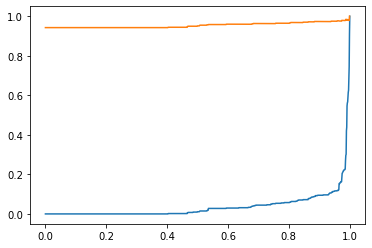

In [24]:
plt.figure()
x=np.zeros((1000,1))
compteur=0
for i in np.arange(0.001,1.001,0.001):
    x[compteur]=i
    compteur=compteur+1
    
plt.plot(x,tauxderejet)
plt.plot(x,tauxdereconnaisance)
plt.show()

Plus le taux de rejet est important plus le taux de reconnaisance augmente néanmoins cela n'est pas immense mais oeut permettre d'ameliorer le modele. EN effet l'avantage d'un reseau de neuronne MLP a lieu lors de data set immense ( pour notre dataset un KNN serai plus efficace) mais si ce model devait rentrer en prod alors il serait bien de maximiser le rejet ( creer une data base de donner rejeter (donc bcp plus petite )) que l'on recalssifierai grace a un KNN cette association augmenterais significativement le nombre de donnée bien calssé en minimisant le temps.

In [25]:
def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))

    return y_masked.filled(-1)

In [26]:
y_pred1=model1.predict_proba(X_test)

In [27]:
tauxderejet=[]
tauxdereconnaisance=[]
for i in np.arange(0.001,1.001,0.001):
    tauxderejet.append((sum(argmax_top2_reject_threshold(y_pred1, i)==-1)/X_test.shape[0]))
    #matrice de confusion
    y_pred_test=argmax_top2_reject_threshold(y_pred1, i)
    #je modifie une valeur pour que toutes les matrices de confusion inclue -1
    y_pred_test[0]=-1
    matricedeconfusion=metrics.confusion_matrix(y_test,y_pred_test)
    #exemple bien classé
    exemplebienclasse=0
    #exempleclasse
    exempleclasse=0
    
    for i in range(1,11):
        for compteur in range (1,11):
            if (i==compteur):
                exemplebienclasse=exemplebienclasse+matricedeconfusion[i][compteur]
            else:
                exempleclasse=exempleclasse+matricedeconfusion[i][compteur]
    exempleclasse=exempleclasse+exemplebienclasse
    tauxdereconnaisance.append(exemplebienclasse/exempleclasse)



<ipython-input-27-000dc8c768a2>:22: RuntimeWarning: invalid value encountered in long_scalars
  tauxdereconnaisance.append(exemplebienclasse/exempleclasse)


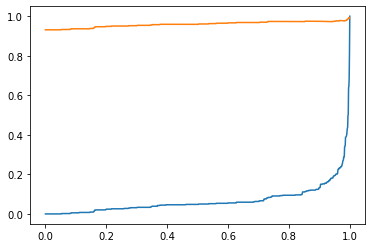

In [220]:
plt.figure()
x=np.zeros((1000,1))
compteur=0
for i in np.arange(0.001,1.001,0.001):
    x[compteur]=i
    compteur=compteur+1
    
plt.plot(x,tauxderejet)
plt.plot(x,tauxdereconnaisance)
plt.show()

Same resultat

## 5. Cascade de classifieurs

Utiliser l'algorithme des k-ppv pour classer les exemples rejetés. Calculer le taux d'erreur global de la cascade de classifieurs constituée de deux étages. Donner les matrices de confusion du 1er étage et de la cascade.

In [8]:
#on execute notre reseau de neuronne:
model5= MLPClassifier(hidden_layer_sizes=18, activation='tanh',solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=0,max_iter=400)
model5.fit(X_train,y_train)


MLPClassifier(activation='tanh', alpha=0, batch_size=1, hidden_layer_sizes=18,
              learning_rate='adaptive', max_iter=400, solver='sgd', verbose=0)

In [18]:
model5.coefs_=np.array(model5.coefs_)
model5.coefs_[0].shape

(64, 18)

In [63]:
#entrainement du KNN
modelKNN=KNeighborsClassifier(n_neighbors=15, algorithm='brute')
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=15)

In [64]:
#realisation des prediction uniquement grace au model MLP entrainé
y_pred_test=model5.predict(X_test)
#on save la matrice de confusion
matriceconfusionpremieretage=metrics.confusion_matrix(y_test,y_pred_test)

In [65]:
matriceconfusionpremieretage

array([[51,  0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0, 46,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 41,  3,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  4, 48,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 58,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  3,  1, 61,  0,  0,  1,  0],
       [ 1,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  2,  0,  1,  0,  1,  0,  0, 39,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  1,  3, 52]])

In [66]:
compteur=0
erreurarraytrain=[]
for i in range(10):
    erreur=0
    for compteur in range(10):
        if (compteur != i):
            erreur=erreur + matriceconfusionpremieretage[compteur][i]
            compteur=compteur+1
        else: 
            compteur=compteur+1
    erreurarraytrain.append(erreur)
    compteur=0

print(f"nous avons {sum(erreurarraytrain)} donnée mal classé ")

nous avons 39 donnée mal classé 


Cette matrice de confusions ne prends pas le rejet

In [67]:
#rejet
y_pred_test1=model5.predict_proba(X_test)
rejet=argmax_reject_threshold(y_pred_test1,0.9)
matriceconfusionrejet=metrics.confusion_matrix(y_test,rejet)

In [68]:
print(f"nous avons {sum(rejet==-1)} exemples rejeté")

nous avons 46 exemples rejeté


In [72]:
matriceconfusionrejet


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 50,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [18,  0, 30,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0, 40,  2,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  4, 47,  0,  1,  0,  0,  1,  0],
       [ 2,  0,  1,  0,  0, 56,  0,  1,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  1, 61,  0,  0,  1,  0],
       [ 3,  1,  0,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0, 51,  0,  1],
       [ 5,  0,  0,  0,  0,  0,  1,  0,  0, 37,  0],
       [ 5,  0,  1,  0,  0,  0,  0,  0,  0,  2, 51]])

nous pouvons voir que que :
2-->0
18-->1
4-->2
1-->3
2-->4
3-->5
3-->6
3-->7
5-->8
5-->9
la probabilité n'a pas été suffisante pour décider de leur calssification. kNN ayant un meilleure taux de reconaissance mais un temps plus long ( si nouss avions un dataset de centaine de millier de donnée) nous ne l'utilisons que en deuxieme recours pour décider sur 46 données ( 8.5% du dataset (le threshold mis etant tres haut pour minimiser l'erreur))

In [75]:
indexrejete=(np.where(rejet==-1))    
#ON FAIT UN PREDICT AVEC NOTRE KNN ET NOTRE KOPI=20    
predictKNN=modelKNN.predict(X_test[indexrejete])
    

In [76]:
#on remplace les predict du knn dans le predict avec rejet pour faire la derniere matrice de confusion
for compteur in range(len(indexrejete[0])):
    rejet[indexrejete[0][compteur]]=predictKNN[compteur]

In [77]:
rejetinitial=sum(rejet==-1)
print(f"nous avons {sum(rejet==-1)} exemples rejeté")

nous avons 0 exemples rejeté


Cela est normal nous les avons tous reclassé grace au knn

In [78]:
#matrice de confusion final
matriceconfusionfinal=metrics.confusion_matrix(y_test,rejet)

In [79]:
matriceconfusionfinal


array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 48,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  2,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  4, 48,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 58,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 64,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 41,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  2,  2, 53]])

In [81]:
compteur=0
erreurarraytrain=[]
for i in range(10):
    erreur=0
    for compteur in range(10):
        if (compteur != i):
            erreur=erreur + matriceconfusionfinal[compteur][i]
            compteur=compteur+1
        else: 
            compteur=compteur+1
    erreurarraytrain.append(erreur)
    compteur=0
erreur=sum(erreurarraytrain)/100
print(f"nous avons {sum(erreurarraytrain)} donnée mal classé ")
print(f"notre taux d'erreur est de : {erreur*100/540}")
print(f"notre taux d'erreur est passé de :{46*100/540} a : {erreur*100/540}")

nous avons 26 donnée mal classé 
notre taux d'erreur est de : 0.04814814814814815
notre taux d'erreur est passé de :8.518518518518519 a : 0.04814814814814815
